In [39]:
# Data wrangling
import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
ss = pd.read_csv("gender_submission.csv")

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
print("Training set shape: ", train.shape)
print("Test set shape: ", test.shape)

Training set shape:  (891, 12)
Test set shape:  (418, 12)


In [11]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [12]:
ss.shape

(418, 2)

In [13]:
# Non-null count and data types of the training and test set

train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [14]:
# Missing data in training set by columns

train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [15]:
# Missing data in test set by columns 

test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

<Axes: >

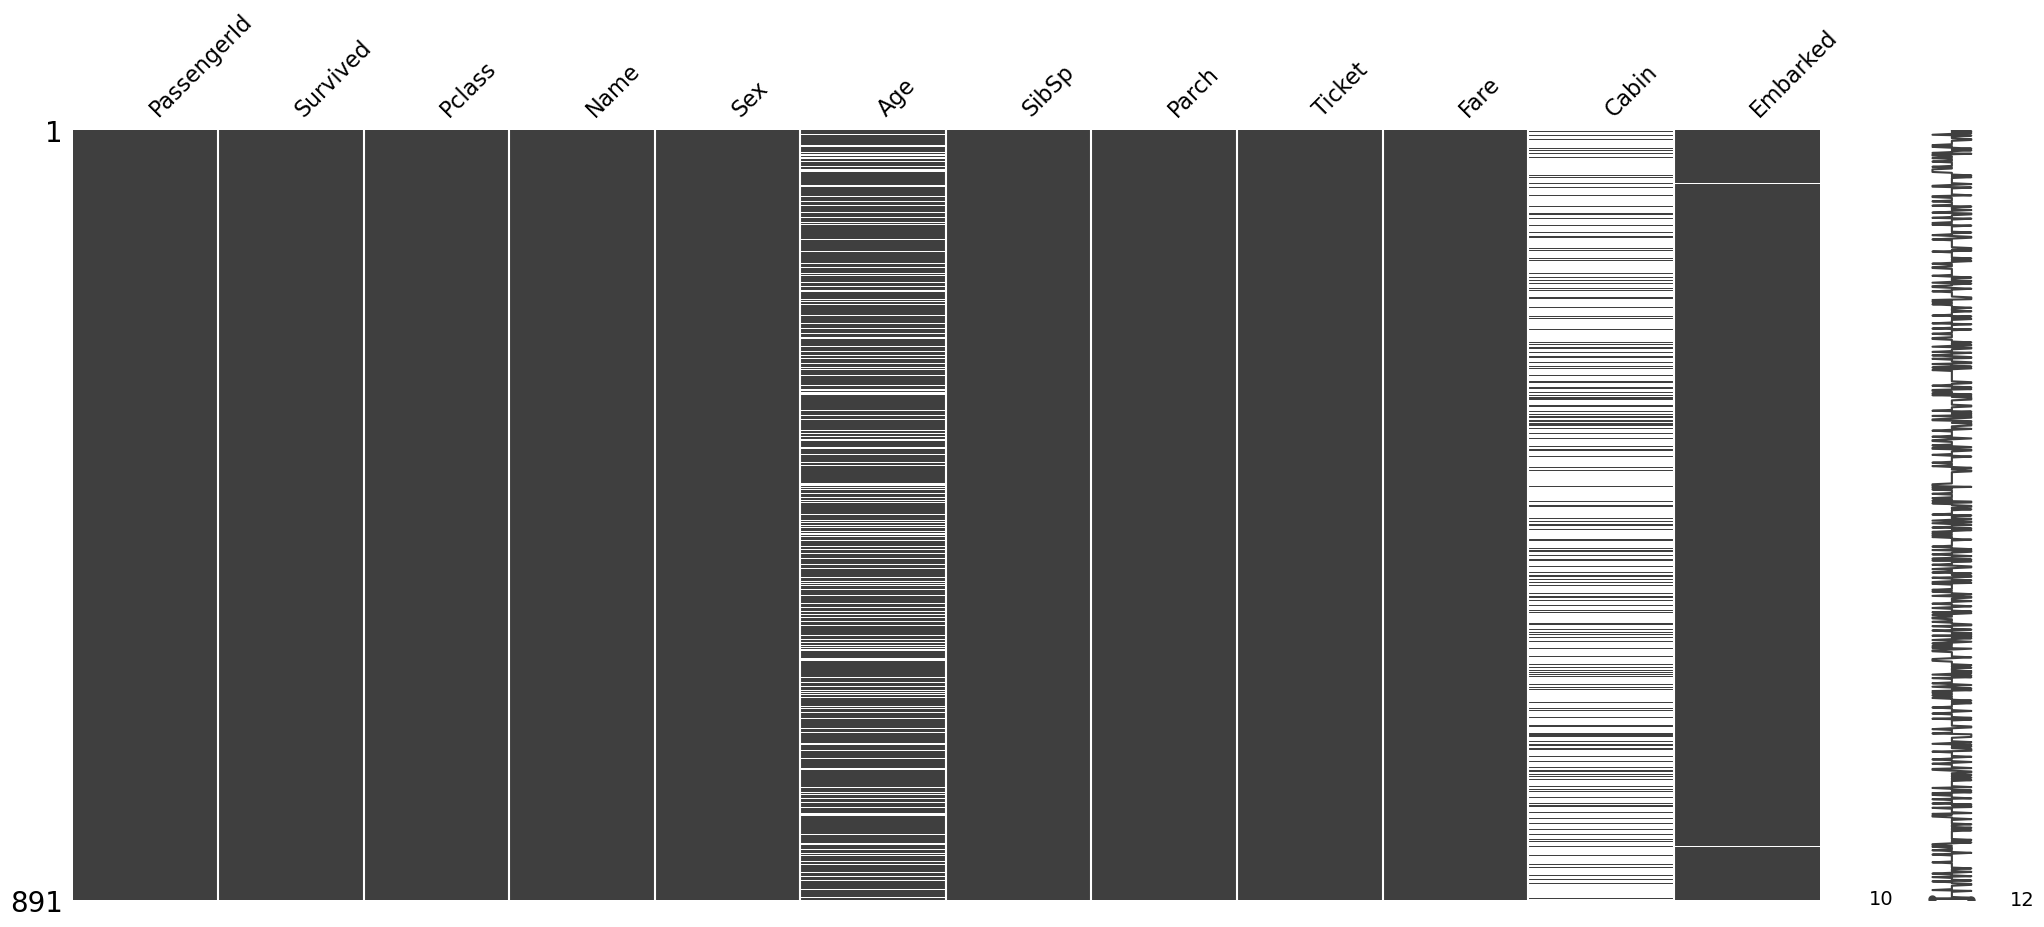

In [16]:
# Missing data in training set

missingno.matrix(train)

<Axes: >

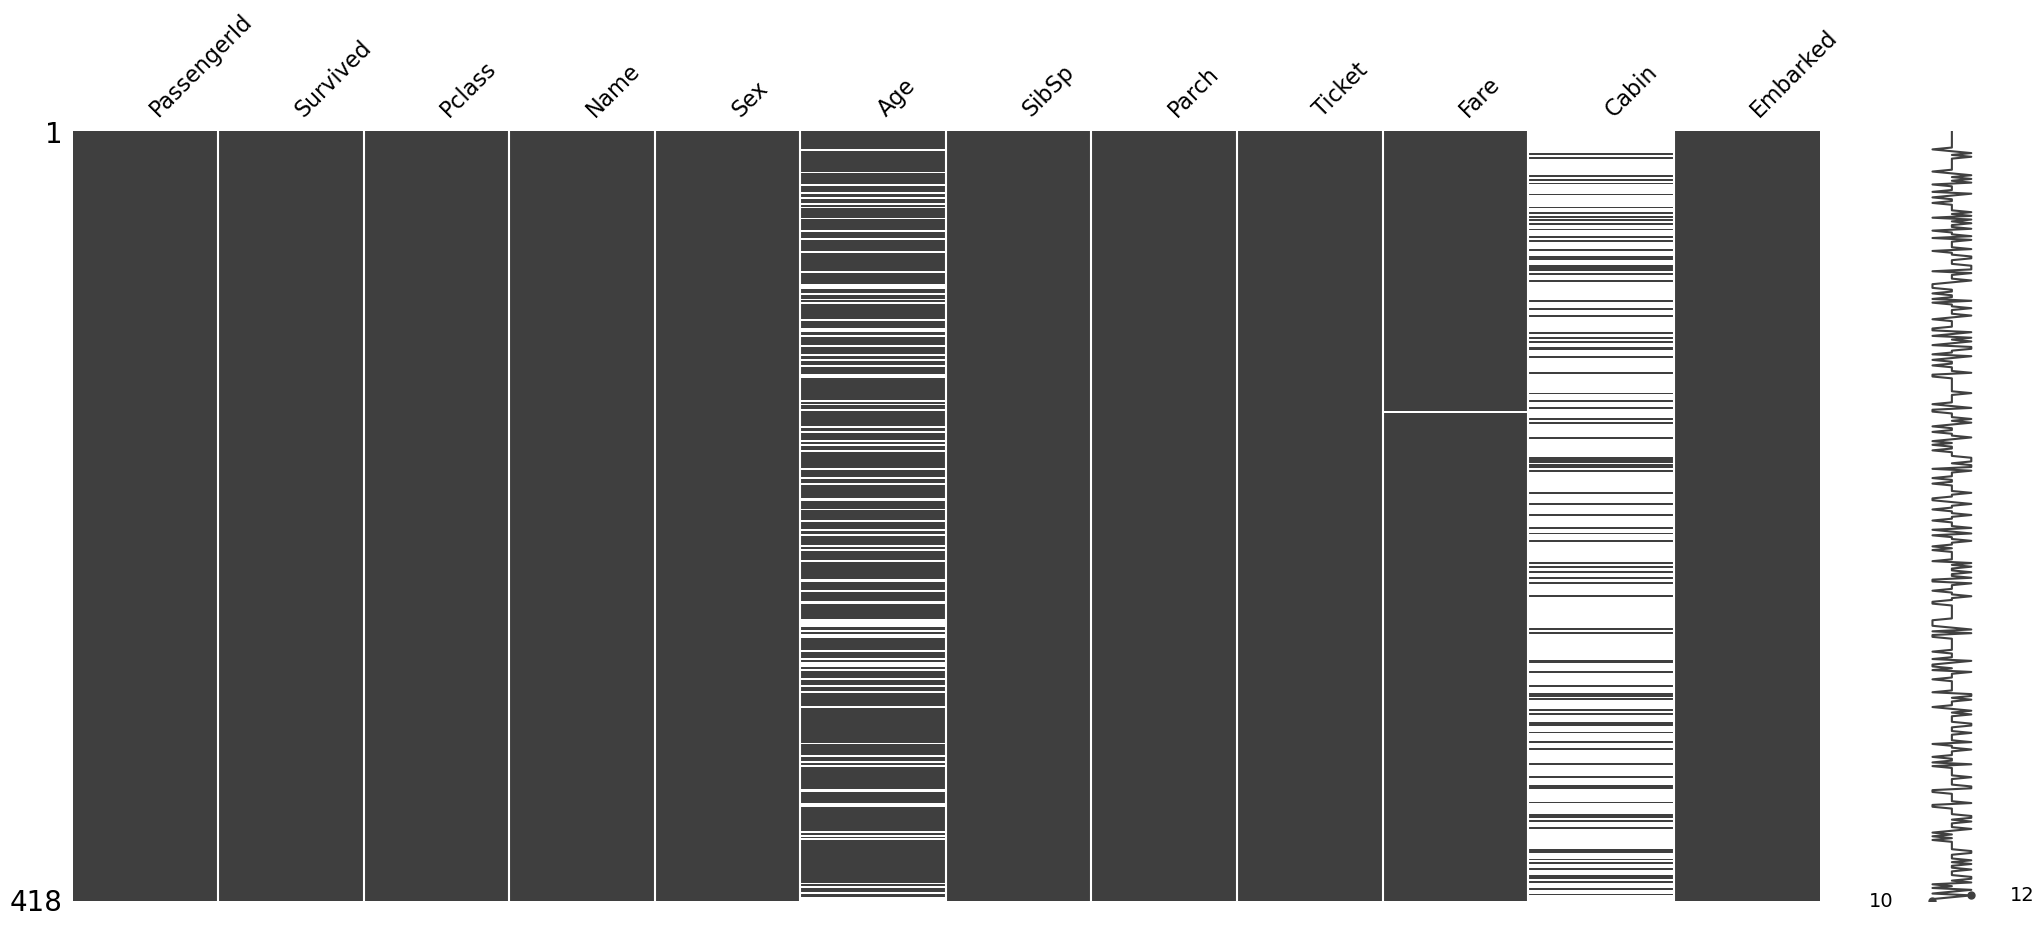

In [17]:
# Missing data in test set 

missingno.matrix(test)

In [18]:
# Summary statistics for training set 

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
# Summary statistics for test set 

test.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [20]:
# Value counts of the sex column

train['Sex'].value_counts(dropna = False)

# Comment: There are more male passengers than female passengers on titanic

Sex
male      577
female    314
Name: count, dtype: int64

In [21]:
# Mean of survival by sex

train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

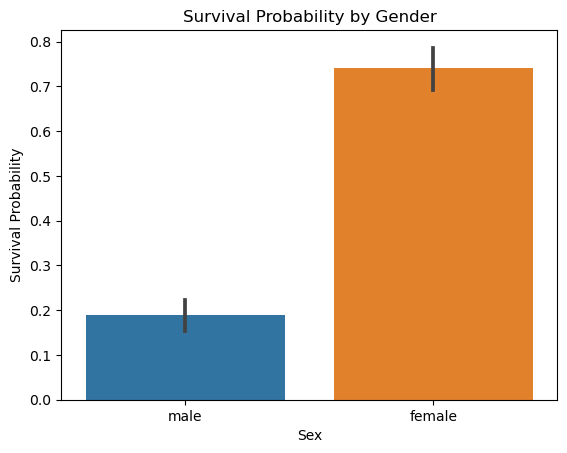

In [22]:
sns.barplot(x = 'Sex', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

# Comment: Female passengers are more likely to survive

In [23]:
# Value counts of the Pclass column 

train['Pclass'].value_counts(dropna = False)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [24]:
# Mean of survival by passenger class

train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival Probability by Passenger Class')

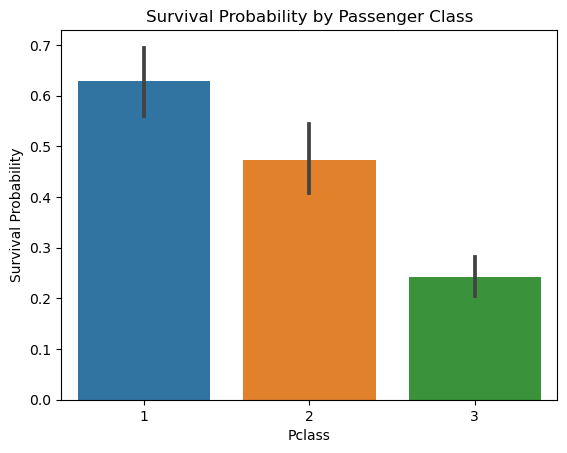

In [25]:
sns.barplot(x = 'Pclass', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')

# Comment: Survival probability decrease with passenger class, first class passengers are prioritised during evacuation

Text(0.5, 1.0, 'Survival Probability by Sex and Passenger Class')

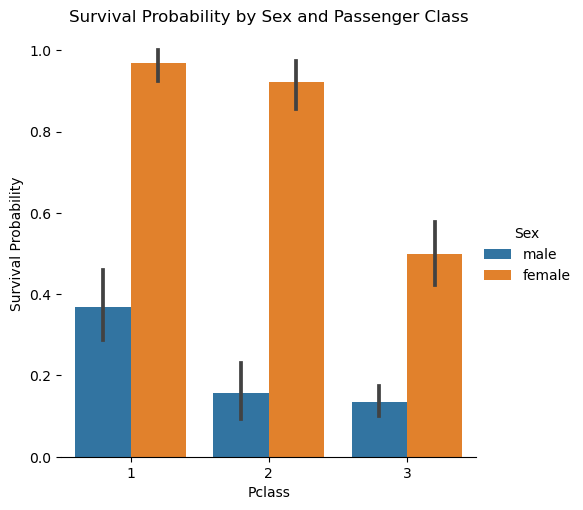

In [41]:
# Survival by gender and passenger class

g = sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train, kind = 'bar')
g.despine(left = True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')

In [42]:
# Value counts of the Embarked column 

train['Embarked'].value_counts(dropna = False)

# Comment: Two missing values in the Embarked column

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [43]:
# Mean of survival by point of embarkation

train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

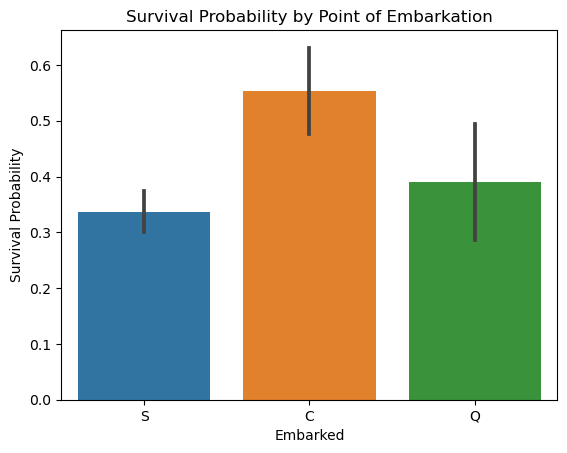

In [44]:
sns.barplot(x = 'Embarked', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')

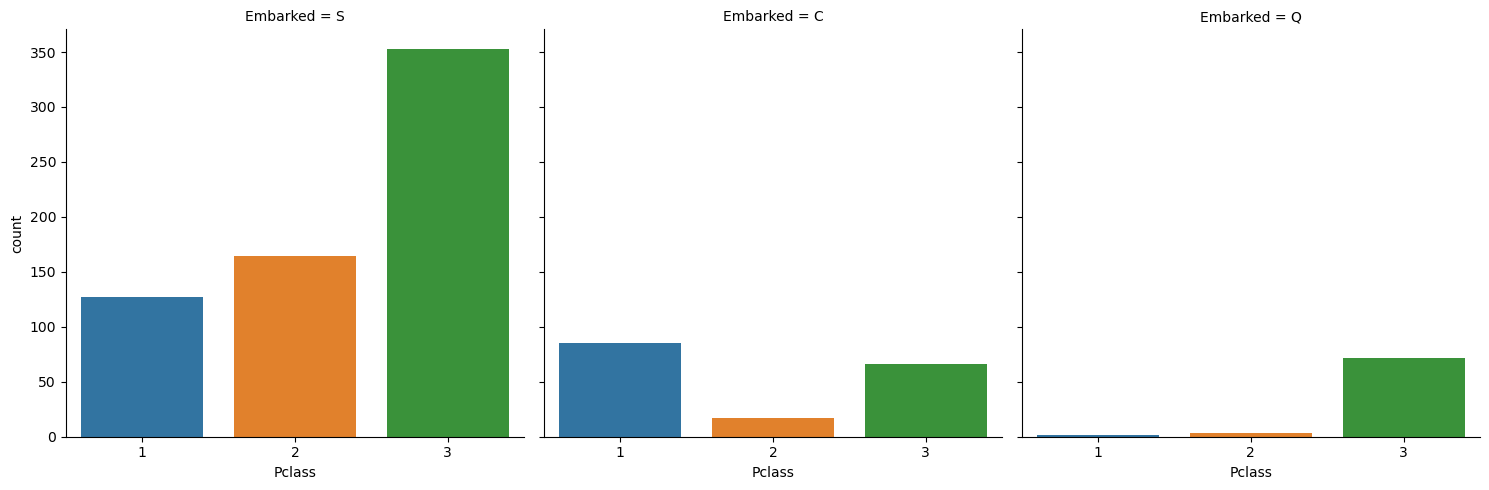

In [50]:
sns.catplot(x='Pclass', col = 'Embarked', data = train, kind = 'count')

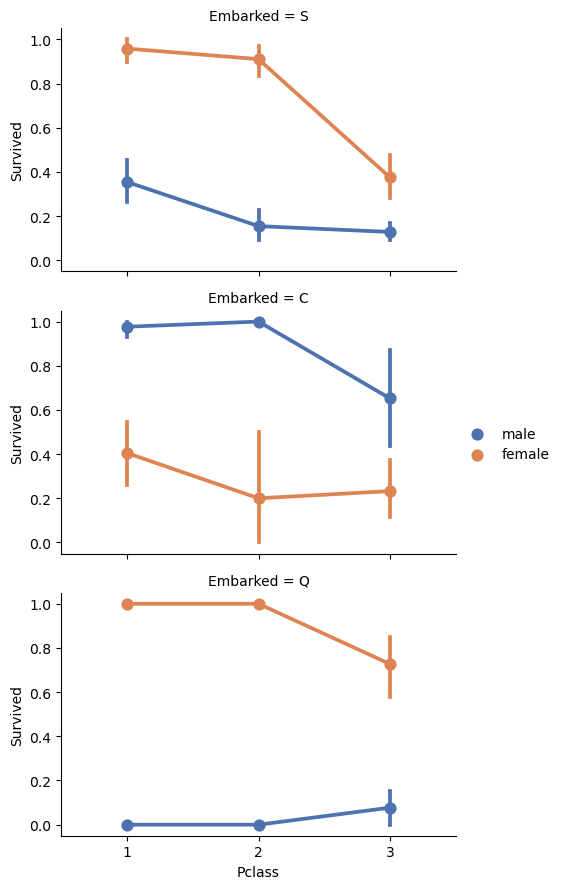

In [52]:
# Survival probability by all categorical variables

grid = sns.FacetGrid(train, row = 'Embarked', aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

In [53]:
def detect_outliers(df, n, features):
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [54]:
# Outliers in numerical variables

train.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [55]:
# Drop outliers and reset index

print("Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(train)))

Before: 891 rows
After: 881 rows


<Axes: >

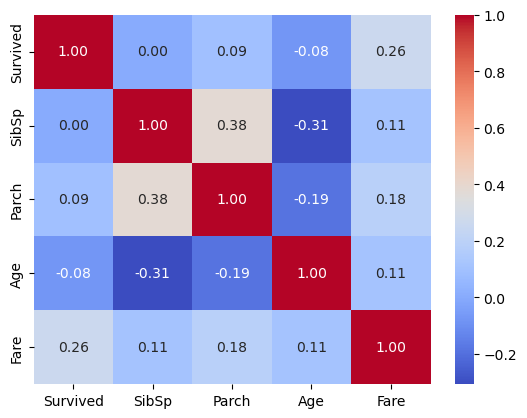

In [56]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

# Comment: Fare seems to be the only feature that has a substantial correlation with survival

In [57]:
# Value counts of the SibSp column 

train['SibSp'].value_counts(dropna = False)

SibSp
0    608
1    209
2     28
4     18
3     13
5      5
Name: count, dtype: int64

In [58]:
# Mean of survival by SibSp

train[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

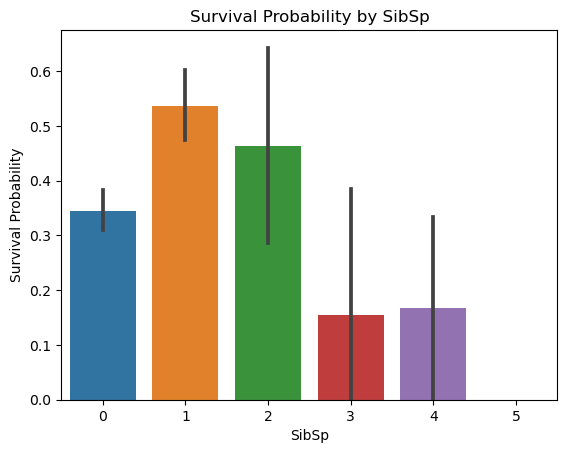

In [59]:
sns.barplot(x = 'SibSp', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

In [60]:
# Value counts of the Parch column 

train['Parch'].value_counts(dropna = False)

Parch
0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [61]:
# Mean of survival by Parch

train[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.542857
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

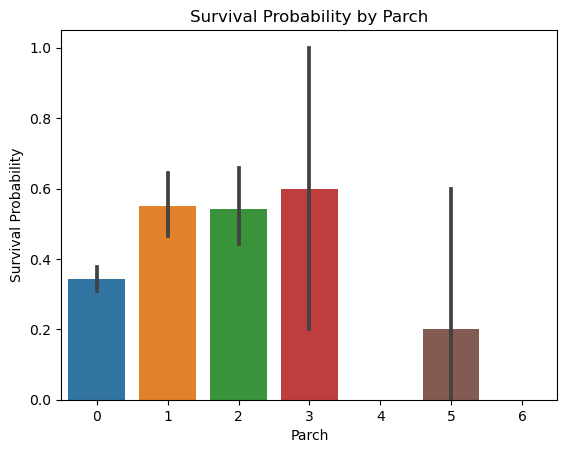

In [62]:
sns.barplot(x = 'Parch', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')

In [63]:
# Null values in Age column 

train['Age'].isnull().sum()

170

Text(0.5, 1.0, 'Passenger Age Distribution')

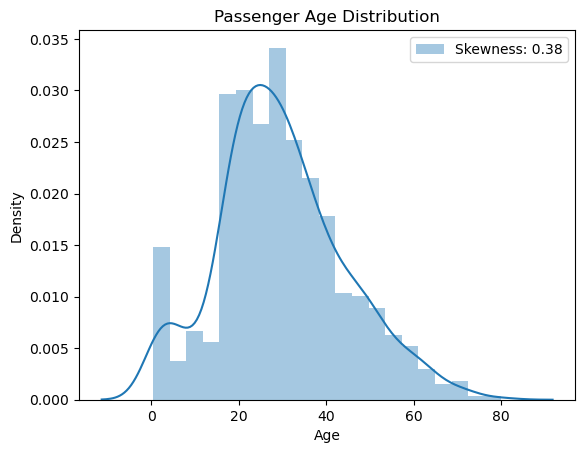

In [64]:
# Passenger age distribution

sns.distplot(train['Age'], label = 'Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

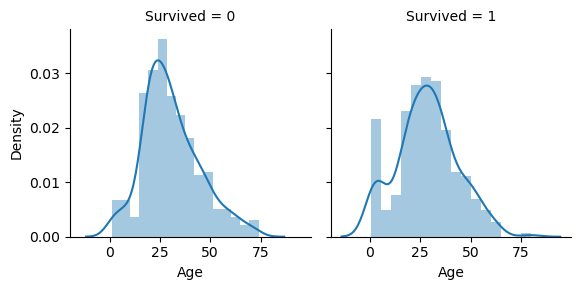

In [65]:
# Age distribution by survival

g = sns.FacetGrid(train, col = 'Survived')
g.map(sns.distplot, 'Age')

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

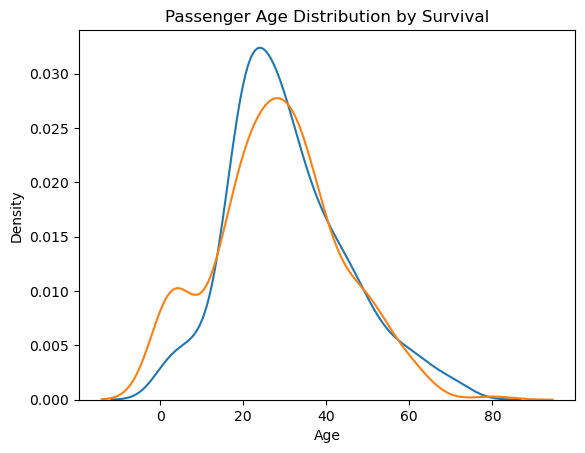

In [66]:
sns.kdeplot(train['Age'][train['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(train['Age'][train['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')

In [67]:
# Null values of Fare column 

train['Fare'].isnull().sum()

0

Text(0, 0.5, 'Passenger Fare Distribution')

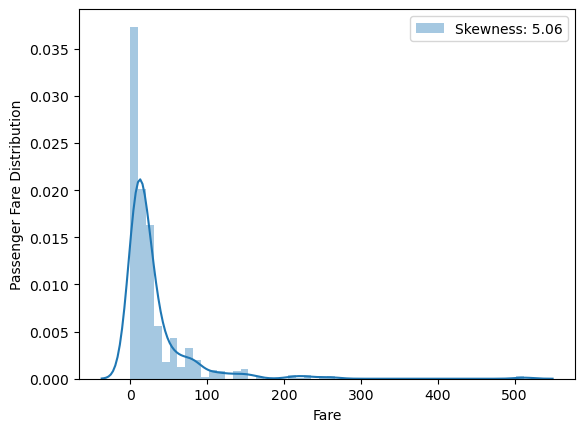

In [68]:
# Passenger fare distribution

sns.distplot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Distribution')

In [69]:
# Drop ticket and cabin features from training and test set

train = train.drop(['Ticket', 'Cabin'], axis = 1)
test = test.drop(['Ticket', 'Cabin'], axis = 1)

In [70]:
# Missing values in training set 

train.isnull().sum().sort_values(ascending = False)

Age            170
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [71]:
# Compute the most frequent value of Embarked in training set

mode = train['Embarked'].dropna().mode()[0]
mode

'S'

In [72]:
# Fill missing value in Embarked with mode

train['Embarked'].fillna(mode, inplace = True)

In [73]:
# Missing values in test set

test.isnull().sum().sort_values(ascending = False)

Age            86
Fare            1
PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [74]:
# Compute median of Fare in test set 

median = test['Fare'].dropna().median()
median

14.4542

In [75]:
# Fill missing value in Fare with median

test['Fare'].fillna(median, inplace = True)

In [76]:
# Combine training set and test set

combine = pd.concat([train, test], axis = 0).reset_index(drop = True)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [77]:
# Missing values in the combined dataset

combine.isnull().sum().sort_values(ascending = False)

Age            256
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [78]:
# Convert Sex into numerical values where 0 = male and 1 = female

combine['Sex'] = combine['Sex'].map({'male': 0, 'female': 1})

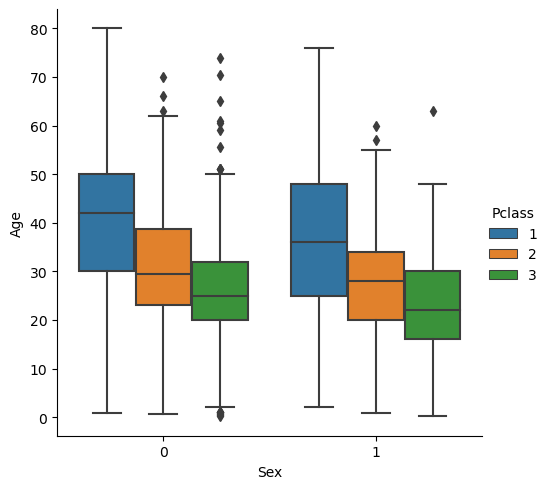

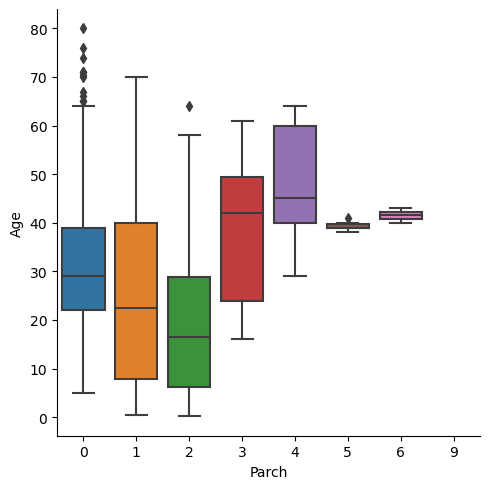

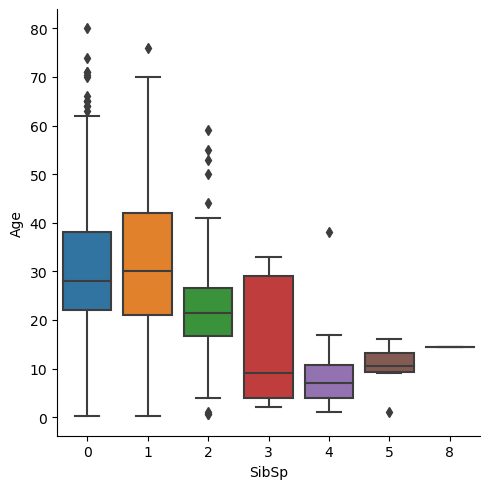

In [80]:
sns.catplot(y = 'Age', x = 'Sex', hue = 'Pclass', kind = 'box', data = combine)
sns.catplot(y = 'Age', x = 'Parch', kind = 'box', data = combine)
sns.catplot(y = 'Age', x = 'SibSp', kind = 'box', data = combine)

In [90]:
# Check number of missing ages 

age_nan_indices = list(combine[combine['Age'].isnull()].index)
len(age_nan_indices)

256

In [91]:
# Loop through list and impute missing ages

for index in age_nan_indices:
    median_age = combine['Age'].median()
    predict_age = combine['Age'][(combine['SibSp'] == combine.iloc[index]['SibSp']) 
                                 & (combine['Parch'] == combine.iloc[index]['Parch'])
                                 & (combine['Pclass'] == combine.iloc[index]["Pclass"])].median()
    if np.isnan(predict_age):
        combine['Age'].iloc[index] = median_age
    else:
        combine['Age'].iloc[index] = predict_age

In [92]:
# Make sure there is no more missing ages 

combine['Age'].isnull().sum()

0

Text(0.5, 1.0, 'Passenger Fare Distribution')

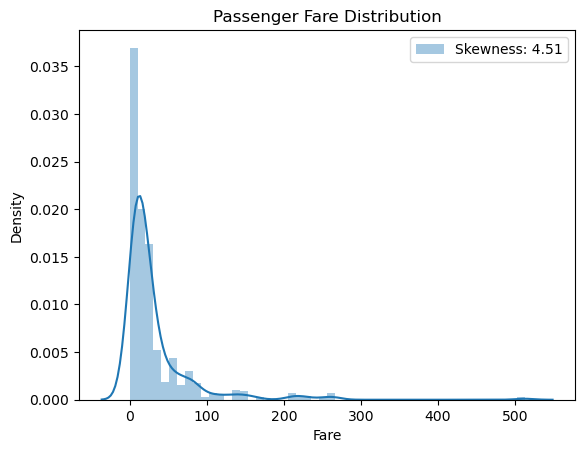

In [93]:
# Passenger fare distribution

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

In [94]:
# Apply log transformation to Fare column to reduce skewness

combine['Fare'] = combine['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Passenger Fare Distribution After Log Transformation')

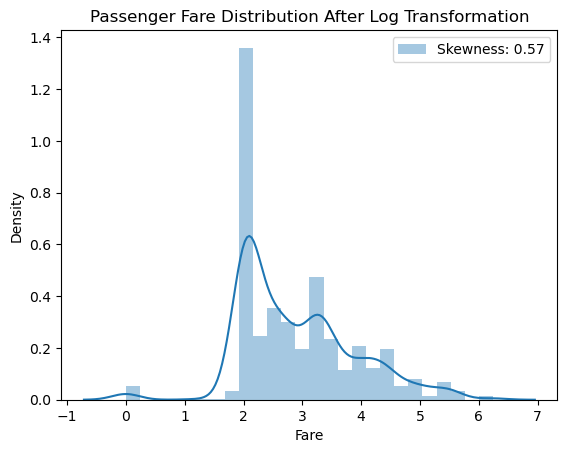

In [95]:
# Passenger fare distribution after log transformation

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution After Log Transformation')

In [96]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S


In [97]:
# Get title from name

combine['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine['Name']]
combine[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [98]:
# Value counts of Title

combine['Title'].value_counts()

Title
Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [99]:
# Number of unique Title

combine['Title'].nunique()

18

In [100]:
# Simplify title

combine['Title'] = combine['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Rare')
combine['Title'] = combine['Title'].replace(['Mlle', 'Ms'], 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')

In [102]:
# Mean of survival by name title

combine[['Title', 'Survived']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Title,Survived
3,Mrs,0.868687
1,Miss,0.799228
0,Master,0.383333
4,Rare,0.310345
2,Mr,0.107570


Text(0.5, 1.0, 'Mean of survival by Title')

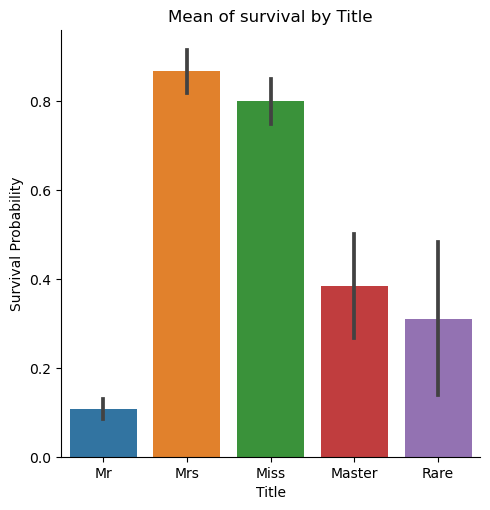

In [104]:
sns.catplot(x = 'Title', y = 'Survived', data = combine, kind = 'bar')
plt.ylabel('Survival Probability')
plt.title('Mean of survival by Title')

In [105]:
# Drop name column

combine = combine.drop('Name', axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,1.981001,S,Mr
1,2,1,1,1,38.0,1,0,4.266662,C,Mrs
2,3,1,3,1,26.0,0,0,2.070022,S,Miss
3,4,1,1,1,35.0,1,0,3.972177,S,Mrs
4,5,0,3,0,35.0,0,0,2.085672,S,Mr


In [106]:
# Calculate family size from SibSp and Parch

combine['FamilySize'] = combine['SibSp'] + combine['Parch'] + 1
combine[['SibSp', 'Parch', 'FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [107]:
# Mean of survival by family size

combine[['FamilySize', 'Survived']].groupby('FamilySize', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.720930
2,3,0.559748
1,2,0.531915
8,11,0.500000
6,7,0.312500
0,1,0.292405
4,5,0.227273
5,6,0.136364
7,8,0.125000


In [108]:
# Create IsAlone feature

combine['IsAlone'] = 0
combine.loc[combine['FamilySize'] == 1, 'IsAlone'] = 1

In [109]:
# Mean of survival by IsAlone

combine[['IsAlone', 'Survived']].groupby('IsAlone', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,IsAlone,Survived
0,0,0.512770
1,1,0.292405


In [110]:
# Drop SibSp, Parch and FamilySize features from combine dataframe

combine = combine.drop(['SibSp', 'Parch', 'FamilySize'], axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,0,22.0,1.981001,S,Mr,0
1,2,1,1,1,38.0,4.266662,C,Mrs,0
2,3,1,3,1,26.0,2.070022,S,Miss,1
3,4,1,1,1,35.0,3.972177,S,Mrs,0
4,5,0,3,0,35.0,2.085672,S,Mr,1


In [111]:
# Create age bands and compute mean of survival by age bands

combine['AgeBand'] = pd.cut(combine['Age'], 5)
combine[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by = 'AgeBand')

,AgeBand,Survived
0,"(0.0902, 16.136]",0.506757
1,"(16.136, 32.102]",0.341160
2,"(32.102, 48.068]",0.399351
3,"(48.068, 64.034]",0.424528
4,"(64.034, 80.0]",0.153846


In [112]:
# Assign ordinals to each age band 

combine.loc[combine['Age'] <= 16.136, 'Age'] = 0
combine.loc[(combine['Age'] > 16.136) & (combine['Age'] <= 32.102), 'Age'] = 1
combine.loc[(combine['Age'] > 32.102) & (combine['Age'] <= 48.068), 'Age'] = 2
combine.loc[(combine['Age'] > 48.068) & (combine['Age'] <= 64.034), 'Age'] = 3
combine.loc[combine['Age'] > 64.034 , 'Age'] = 4

In [113]:
# Drop age band feature

combine = combine.drop('AgeBand', axis = 1)

In [114]:
# Age and Pclass data types 

combine[['Age', 'Pclass']].dtypes

Age       float64
Pclass      int64
dtype: object

In [115]:
# Convert ordinal Age into integer

combine['Age'] = combine['Age'].astype('int')
combine['Age'].dtype

dtype('int32')

In [116]:
# Create Age*Class feature

combine['Age*Class'] = combine['Age'] * combine['Pclass']
combine[['Age', 'Pclass', 'Age*Class']].head()

,Age,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


In [117]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,0,3,0,1,1.981001,S,Mr,0,3
1,2,1,1,1,2,4.266662,C,Mrs,0,2
2,3,1,3,1,1,2.070022,S,Miss,1,3
3,4,1,1,1,2,3.972177,S,Mrs,0,2
4,5,0,3,0,2,2.085672,S,Mr,1,6


In [118]:
# Encode Title and Embarked feature

combine = pd.get_dummies(combine, columns = ['Title'])
combine = pd.get_dummies(combine, columns = ['Embarked'], prefix = 'Em')
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0,3,0,1,1.981001,0,3,False,False,True,False,False,False,False,True
1,2,1,1,1,2,4.266662,0,2,False,False,False,True,False,True,False,False
2,3,1,3,1,1,2.070022,1,3,False,True,False,False,False,False,False,True
3,4,1,1,1,2,3.972177,0,2,False,False,False,True,False,False,False,True
4,5,0,3,0,2,2.085672,1,6,False,False,True,False,False,False,False,True


In [119]:
# Divide Fare into four bands

combine['FareBand'] = pd.cut(combine['Fare'], 4)
combine[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by = 'FareBand')

,FareBand,Survived
0,"(-0.00624, 1.56]",0.052632
1,"(1.56, 3.119]",0.293059
2,"(3.119, 4.679]",0.492925
3,"(4.679, 6.239]",0.692308


In [120]:
# Assign ordinal to each fare band

combine.loc[combine['Fare'] <= 1.56, 'Fare'] = 0
combine.loc[(combine['Fare'] > 1.56) & (combine['Fare'] <= 3.119), 'Fare'] = 1
combine.loc[(combine['Fare'] > 3.119) & (combine['Fare'] <= 4.679), 'Fare'] = 2
combine.loc[combine['Fare'] > 4.679, 'Fare'] = 3

In [121]:
# Convert Fare into integer

combine['Fare'] = combine['Fare'].astype('int')

In [122]:
# Drop FareBand feature

combine = combine.drop('FareBand', axis = 1)

In [123]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0,3,0,1,1,0,3,False,False,True,False,False,False,False,True
1,2,1,1,1,2,2,0,2,False,False,False,True,False,True,False,False
2,3,1,3,1,1,1,1,3,False,True,False,False,False,False,False,True
3,4,1,1,1,2,2,0,2,False,False,False,True,False,False,False,True
4,5,0,3,0,2,1,1,6,False,False,True,False,False,False,False,True


In [124]:
# Separate training and test set from the combined dataframe

train = combine[:len(train)]
test = combine[len(train):]

In [125]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0,3,0,1,1,0,3,False,False,True,False,False,False,False,True
1,2,1,1,1,2,2,0,2,False,False,False,True,False,True,False,False
2,3,1,3,1,1,1,1,3,False,True,False,False,False,False,False,True
3,4,1,1,1,2,2,0,2,False,False,False,True,False,False,False,True
4,5,0,3,0,2,1,1,6,False,False,True,False,False,False,False,True


In [126]:
# Drop passenger ID column from and training set

train = train.drop('PassengerId', axis = 1)
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,1,1,0,3,False,False,True,False,False,False,False,True
1,1,1,1,2,2,0,2,False,False,False,True,False,True,False,False
2,1,3,1,1,1,1,3,False,True,False,False,False,False,False,True
3,1,1,1,2,2,0,2,False,False,False,True,False,False,False,True
4,0,3,0,2,1,1,6,False,False,True,False,False,False,False,True


In [127]:
# Convert survived back to integer in the training set

train['Survived'] = train['Survived'].astype('int')
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,1,1,0,3,False,False,True,False,False,False,False,True
1,1,1,1,2,2,0,2,False,False,False,True,False,True,False,False
2,1,3,1,1,1,1,3,False,True,False,False,False,False,False,True
3,1,1,1,2,2,0,2,False,False,False,True,False,False,False,True
4,0,3,0,2,1,1,6,False,False,True,False,False,False,False,True


In [128]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,0,3,0,2,1,1,6,False,False,True,False,False,False,True,False
882,893,1,3,1,2,1,0,6,False,False,False,True,False,False,False,True
883,894,0,2,0,3,1,1,6,False,False,True,False,False,False,True,False
884,895,0,3,0,1,1,1,3,False,False,True,False,False,False,False,True
885,896,1,3,1,1,1,0,3,False,False,False,True,False,False,False,True


In [129]:
# Drop passenger survived column from test set

test = test.drop('Survived', axis = 1)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,3,0,2,1,1,6,False,False,True,False,False,False,True,False
882,893,3,1,2,1,0,6,False,False,False,True,False,False,False,True
883,894,2,0,3,1,1,6,False,False,True,False,False,False,True,False
884,895,3,0,1,1,1,3,False,False,True,False,False,False,False,True
885,896,3,1,1,1,0,3,False,False,False,True,False,False,False,True


In [130]:
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis = 1).copy()
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (881, 14)
Y_train shape:  (881,)
X_test shape:  (418, 14)


In [131]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.93

In [132]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.09

In [133]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.34

In [134]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.11

In [135]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.57

In [136]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

80.25

In [137]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

82.18

In [138]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.7

In [139]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.58

In [140]:
catboost = CatBoostClassifier()
catboost.fit(X_train, Y_train)
Y_pred = catboost.predict(X_test)
acc_catboost = round(catboost.score(X_train, Y_train) * 100, 2)

Learning rate set to 0.00976
0:	learn: 0.6868136	total: 155ms	remaining: 2m 35s
1:	learn: 0.6798485	total: 158ms	remaining: 1m 18s
2:	learn: 0.6729520	total: 161ms	remaining: 53.4s
3:	learn: 0.6669729	total: 163ms	remaining: 40.6s
4:	learn: 0.6607853	total: 166ms	remaining: 33s
5:	learn: 0.6554568	total: 168ms	remaining: 27.9s
6:	learn: 0.6500727	total: 170ms	remaining: 24.2s
7:	learn: 0.6437982	total: 174ms	remaining: 21.6s
8:	learn: 0.6398272	total: 178ms	remaining: 19.6s
9:	learn: 0.6351628	total: 181ms	remaining: 17.9s
10:	learn: 0.6305969	total: 183ms	remaining: 16.5s
11:	learn: 0.6252274	total: 187ms	remaining: 15.4s
12:	learn: 0.6203165	total: 190ms	remaining: 14.4s
13:	learn: 0.6163249	total: 193ms	remaining: 13.6s
14:	learn: 0.6126752	total: 195ms	remaining: 12.8s
15:	learn: 0.6078515	total: 199ms	remaining: 12.2s
16:	learn: 0.6033553	total: 202ms	remaining: 11.7s
17:	learn: 0.5984437	total: 205ms	remaining: 11.2s
18:	learn: 0.5935188	total: 212ms	remaining: 11s
19:	learn: 0.5

223:	learn: 0.3783817	total: 731ms	remaining: 2.53s
224:	learn: 0.3782131	total: 735ms	remaining: 2.53s
225:	learn: 0.3780237	total: 738ms	remaining: 2.53s
226:	learn: 0.3778051	total: 741ms	remaining: 2.52s
227:	learn: 0.3777072	total: 743ms	remaining: 2.52s
228:	learn: 0.3774516	total: 746ms	remaining: 2.51s
229:	learn: 0.3773283	total: 748ms	remaining: 2.5s
230:	learn: 0.3771741	total: 751ms	remaining: 2.5s
231:	learn: 0.3768482	total: 754ms	remaining: 2.5s
232:	learn: 0.3767748	total: 756ms	remaining: 2.49s
233:	learn: 0.3764943	total: 760ms	remaining: 2.49s
234:	learn: 0.3763347	total: 764ms	remaining: 2.48s
235:	learn: 0.3762143	total: 767ms	remaining: 2.48s
236:	learn: 0.3760143	total: 770ms	remaining: 2.48s
237:	learn: 0.3759091	total: 774ms	remaining: 2.48s
238:	learn: 0.3758028	total: 776ms	remaining: 2.47s
239:	learn: 0.3756494	total: 779ms	remaining: 2.46s
240:	learn: 0.3754213	total: 781ms	remaining: 2.46s
241:	learn: 0.3752380	total: 784ms	remaining: 2.46s
242:	learn: 0.3

417:	learn: 0.3583569	total: 1.26s	remaining: 1.75s
418:	learn: 0.3582750	total: 1.26s	remaining: 1.75s
419:	learn: 0.3582003	total: 1.27s	remaining: 1.75s
420:	learn: 0.3581815	total: 1.27s	remaining: 1.75s
421:	learn: 0.3581692	total: 1.27s	remaining: 1.74s
422:	learn: 0.3581016	total: 1.27s	remaining: 1.74s
423:	learn: 0.3580368	total: 1.28s	remaining: 1.74s
424:	learn: 0.3579752	total: 1.28s	remaining: 1.73s
425:	learn: 0.3578452	total: 1.28s	remaining: 1.73s
426:	learn: 0.3577917	total: 1.29s	remaining: 1.73s
427:	learn: 0.3577287	total: 1.29s	remaining: 1.73s
428:	learn: 0.3576302	total: 1.29s	remaining: 1.72s
429:	learn: 0.3576008	total: 1.3s	remaining: 1.72s
430:	learn: 0.3575568	total: 1.3s	remaining: 1.72s
431:	learn: 0.3574216	total: 1.3s	remaining: 1.71s
432:	learn: 0.3573279	total: 1.31s	remaining: 1.71s
433:	learn: 0.3572711	total: 1.31s	remaining: 1.71s
434:	learn: 0.3571691	total: 1.31s	remaining: 1.7s
435:	learn: 0.3571356	total: 1.31s	remaining: 1.7s
436:	learn: 0.357

634:	learn: 0.3467121	total: 1.81s	remaining: 1.04s
635:	learn: 0.3466751	total: 1.81s	remaining: 1.04s
636:	learn: 0.3466594	total: 1.82s	remaining: 1.04s
637:	learn: 0.3466396	total: 1.82s	remaining: 1.03s
638:	learn: 0.3466274	total: 1.82s	remaining: 1.03s
639:	learn: 0.3465472	total: 1.82s	remaining: 1.03s
640:	learn: 0.3464940	total: 1.83s	remaining: 1.02s
641:	learn: 0.3464836	total: 1.83s	remaining: 1.02s
642:	learn: 0.3464723	total: 1.83s	remaining: 1.02s
643:	learn: 0.3464126	total: 1.84s	remaining: 1.01s
644:	learn: 0.3463381	total: 1.84s	remaining: 1.01s
645:	learn: 0.3462645	total: 1.84s	remaining: 1.01s
646:	learn: 0.3461968	total: 1.85s	remaining: 1.01s
647:	learn: 0.3461469	total: 1.85s	remaining: 1s
648:	learn: 0.3460883	total: 1.85s	remaining: 1s
649:	learn: 0.3460109	total: 1.85s	remaining: 999ms
650:	learn: 0.3459846	total: 1.86s	remaining: 996ms
651:	learn: 0.3459401	total: 1.86s	remaining: 993ms
652:	learn: 0.3459043	total: 1.86s	remaining: 990ms
653:	learn: 0.3459

829:	learn: 0.3387776	total: 2.33s	remaining: 478ms
830:	learn: 0.3387248	total: 2.34s	remaining: 476ms
831:	learn: 0.3386686	total: 2.34s	remaining: 473ms
832:	learn: 0.3386290	total: 2.35s	remaining: 471ms
833:	learn: 0.3385835	total: 2.35s	remaining: 468ms
834:	learn: 0.3385558	total: 2.35s	remaining: 466ms
835:	learn: 0.3385304	total: 2.36s	remaining: 463ms
836:	learn: 0.3384741	total: 2.36s	remaining: 460ms
837:	learn: 0.3384280	total: 2.37s	remaining: 458ms
838:	learn: 0.3383878	total: 2.37s	remaining: 455ms
839:	learn: 0.3383571	total: 2.38s	remaining: 453ms
840:	learn: 0.3383244	total: 2.38s	remaining: 450ms
841:	learn: 0.3382841	total: 2.38s	remaining: 447ms
842:	learn: 0.3382839	total: 2.38s	remaining: 444ms
843:	learn: 0.3382590	total: 2.39s	remaining: 441ms
844:	learn: 0.3382088	total: 2.39s	remaining: 438ms
845:	learn: 0.3381537	total: 2.39s	remaining: 435ms
846:	learn: 0.3380945	total: 2.39s	remaining: 433ms
847:	learn: 0.3380649	total: 2.4s	remaining: 430ms
848:	learn: 0

996:	learn: 0.3328743	total: 2.89s	remaining: 8.7ms
997:	learn: 0.3328296	total: 2.9s	remaining: 5.8ms
998:	learn: 0.3328071	total: 2.9s	remaining: 2.9ms
999:	learn: 0.3327689	total: 2.9s	remaining: 0us


In [141]:
acc_catboost

85.7

In [142]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
                                 'Linear SVC', 'Decision Tree', 'CatBoost'],
                       'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron,
                                 acc_sgd, acc_linear_svc, acc_decision_tree, acc_catboost]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Decision Tree,85.70
1,CatBoost,85.70
2,Random Forest,85.58
3,KNN,84.34
4,Support Vector Machines,83.09
5,Stochastic Gradient Decent,82.18
6,Logistic Regression,80.93
7,Linear SVC,80.25
8,Perceptron,79.57
9,Naive Bayes,79.11


In [143]:
# Create a list which contains classifiers 

classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())

len(classifiers)

10

In [144]:
# Create a list which contains cross validation results for each classifier

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 10))

Learning rate set to 0.009326
0:	learn: 0.6870154	total: 2.29ms	remaining: 2.29s
1:	learn: 0.6803102	total: 4.42ms	remaining: 2.21s
2:	learn: 0.6743326	total: 6.69ms	remaining: 2.22s
3:	learn: 0.6684760	total: 8.63ms	remaining: 2.15s
4:	learn: 0.6624557	total: 10.5ms	remaining: 2.09s
5:	learn: 0.6573314	total: 13.6ms	remaining: 2.25s
6:	learn: 0.6520748	total: 17ms	remaining: 2.42s
7:	learn: 0.6460856	total: 20.4ms	remaining: 2.53s
8:	learn: 0.6422711	total: 23.4ms	remaining: 2.57s
9:	learn: 0.6376840	total: 26.8ms	remaining: 2.65s
10:	learn: 0.6326541	total: 29.7ms	remaining: 2.67s
11:	learn: 0.6272334	total: 31.7ms	remaining: 2.61s
12:	learn: 0.6224744	total: 33.5ms	remaining: 2.54s
13:	learn: 0.6175199	total: 35.6ms	remaining: 2.5s
14:	learn: 0.6124417	total: 37.6ms	remaining: 2.47s
15:	learn: 0.6097890	total: 38.8ms	remaining: 2.38s
16:	learn: 0.6050558	total: 41.8ms	remaining: 2.42s
17:	learn: 0.6004952	total: 44ms	remaining: 2.4s
18:	learn: 0.5958639	total: 45.9ms	remaining: 2.37

200:	learn: 0.3808502	total: 511ms	remaining: 2.03s
201:	learn: 0.3805831	total: 515ms	remaining: 2.03s
202:	learn: 0.3804538	total: 517ms	remaining: 2.03s
203:	learn: 0.3803011	total: 520ms	remaining: 2.03s
204:	learn: 0.3799464	total: 522ms	remaining: 2.02s
205:	learn: 0.3796333	total: 524ms	remaining: 2.02s
206:	learn: 0.3792998	total: 527ms	remaining: 2.02s
207:	learn: 0.3791658	total: 530ms	remaining: 2.02s
208:	learn: 0.3790168	total: 533ms	remaining: 2.02s
209:	learn: 0.3787908	total: 535ms	remaining: 2.01s
210:	learn: 0.3786368	total: 537ms	remaining: 2.01s
211:	learn: 0.3785186	total: 540ms	remaining: 2s
212:	learn: 0.3782517	total: 543ms	remaining: 2s
213:	learn: 0.3780859	total: 545ms	remaining: 2s
214:	learn: 0.3778691	total: 548ms	remaining: 2s
215:	learn: 0.3777647	total: 551ms	remaining: 2s
216:	learn: 0.3777440	total: 552ms	remaining: 1.99s
217:	learn: 0.3773868	total: 554ms	remaining: 1.99s
218:	learn: 0.3771312	total: 557ms	remaining: 1.99s
219:	learn: 0.3771142	total

415:	learn: 0.3530424	total: 1.05s	remaining: 1.48s
416:	learn: 0.3529508	total: 1.05s	remaining: 1.47s
417:	learn: 0.3528703	total: 1.06s	remaining: 1.47s
418:	learn: 0.3528009	total: 1.06s	remaining: 1.47s
419:	learn: 0.3527983	total: 1.06s	remaining: 1.47s
420:	learn: 0.3526747	total: 1.06s	remaining: 1.46s
421:	learn: 0.3525552	total: 1.07s	remaining: 1.46s
422:	learn: 0.3524764	total: 1.07s	remaining: 1.46s
423:	learn: 0.3524234	total: 1.07s	remaining: 1.46s
424:	learn: 0.3523517	total: 1.07s	remaining: 1.45s
425:	learn: 0.3523133	total: 1.08s	remaining: 1.45s
426:	learn: 0.3522031	total: 1.08s	remaining: 1.45s
427:	learn: 0.3520956	total: 1.08s	remaining: 1.45s
428:	learn: 0.3520106	total: 1.09s	remaining: 1.45s
429:	learn: 0.3519574	total: 1.09s	remaining: 1.45s
430:	learn: 0.3518900	total: 1.09s	remaining: 1.44s
431:	learn: 0.3517893	total: 1.1s	remaining: 1.44s
432:	learn: 0.3517141	total: 1.1s	remaining: 1.44s
433:	learn: 0.3516505	total: 1.1s	remaining: 1.44s
434:	learn: 0.3

619:	learn: 0.3408271	total: 1.59s	remaining: 973ms
620:	learn: 0.3408239	total: 1.59s	remaining: 972ms
621:	learn: 0.3407958	total: 1.59s	remaining: 970ms
622:	learn: 0.3407828	total: 1.6s	remaining: 967ms
623:	learn: 0.3407409	total: 1.6s	remaining: 965ms
624:	learn: 0.3406710	total: 1.6s	remaining: 963ms
625:	learn: 0.3406184	total: 1.61s	remaining: 960ms
626:	learn: 0.3405546	total: 1.61s	remaining: 957ms
627:	learn: 0.3404910	total: 1.61s	remaining: 955ms
628:	learn: 0.3404397	total: 1.61s	remaining: 953ms
629:	learn: 0.3404399	total: 1.62s	remaining: 950ms
630:	learn: 0.3404091	total: 1.62s	remaining: 947ms
631:	learn: 0.3403148	total: 1.62s	remaining: 945ms
632:	learn: 0.3402863	total: 1.63s	remaining: 942ms
633:	learn: 0.3402313	total: 1.63s	remaining: 944ms
634:	learn: 0.3401831	total: 1.64s	remaining: 941ms
635:	learn: 0.3401357	total: 1.64s	remaining: 938ms
636:	learn: 0.3401161	total: 1.64s	remaining: 936ms
637:	learn: 0.3400681	total: 1.65s	remaining: 934ms
638:	learn: 0.3

831:	learn: 0.3310882	total: 2.12s	remaining: 428ms
832:	learn: 0.3310197	total: 2.12s	remaining: 426ms
833:	learn: 0.3309859	total: 2.13s	remaining: 423ms
834:	learn: 0.3309523	total: 2.13s	remaining: 421ms
835:	learn: 0.3309056	total: 2.13s	remaining: 418ms
836:	learn: 0.3308495	total: 2.13s	remaining: 416ms
837:	learn: 0.3307758	total: 2.14s	remaining: 413ms
838:	learn: 0.3307287	total: 2.14s	remaining: 410ms
839:	learn: 0.3306895	total: 2.14s	remaining: 408ms
840:	learn: 0.3306368	total: 2.14s	remaining: 405ms
841:	learn: 0.3305893	total: 2.15s	remaining: 403ms
842:	learn: 0.3305537	total: 2.15s	remaining: 400ms
843:	learn: 0.3305086	total: 2.15s	remaining: 398ms
844:	learn: 0.3304242	total: 2.15s	remaining: 395ms
845:	learn: 0.3303922	total: 2.16s	remaining: 393ms
846:	learn: 0.3303395	total: 2.16s	remaining: 390ms
847:	learn: 0.3303063	total: 2.16s	remaining: 388ms
848:	learn: 0.3302427	total: 2.17s	remaining: 386ms
849:	learn: 0.3301644	total: 2.17s	remaining: 383ms
850:	learn: 

Learning rate set to 0.009331
0:	learn: 0.6869381	total: 4.22ms	remaining: 4.21s
1:	learn: 0.6815679	total: 6.91ms	remaining: 3.45s
2:	learn: 0.6779477	total: 8.98ms	remaining: 2.98s
3:	learn: 0.6715465	total: 13.1ms	remaining: 3.25s
4:	learn: 0.6660257	total: 16.2ms	remaining: 3.22s
5:	learn: 0.6612567	total: 18.8ms	remaining: 3.11s
6:	learn: 0.6555796	total: 22.3ms	remaining: 3.17s
7:	learn: 0.6499929	total: 25.9ms	remaining: 3.21s
8:	learn: 0.6449620	total: 29.1ms	remaining: 3.21s
9:	learn: 0.6392656	total: 32.9ms	remaining: 3.26s
10:	learn: 0.6346019	total: 36.6ms	remaining: 3.29s
11:	learn: 0.6291850	total: 39.7ms	remaining: 3.27s
12:	learn: 0.6252388	total: 41.6ms	remaining: 3.16s
13:	learn: 0.6204141	total: 44.7ms	remaining: 3.15s
14:	learn: 0.6158605	total: 48.2ms	remaining: 3.16s
15:	learn: 0.6108704	total: 51.3ms	remaining: 3.16s
16:	learn: 0.6057113	total: 54.5ms	remaining: 3.15s
17:	learn: 0.6008714	total: 57.4ms	remaining: 3.13s
18:	learn: 0.5963858	total: 60.4ms	remaining

225:	learn: 0.3811619	total: 532ms	remaining: 1.82s
226:	learn: 0.3810310	total: 535ms	remaining: 1.82s
227:	learn: 0.3807389	total: 537ms	remaining: 1.82s
228:	learn: 0.3805727	total: 539ms	remaining: 1.81s
229:	learn: 0.3803352	total: 542ms	remaining: 1.81s
230:	learn: 0.3802175	total: 544ms	remaining: 1.81s
231:	learn: 0.3799781	total: 546ms	remaining: 1.81s
232:	learn: 0.3797373	total: 549ms	remaining: 1.8s
233:	learn: 0.3795338	total: 551ms	remaining: 1.8s
234:	learn: 0.3793260	total: 553ms	remaining: 1.8s
235:	learn: 0.3792149	total: 555ms	remaining: 1.8s
236:	learn: 0.3791549	total: 557ms	remaining: 1.79s
237:	learn: 0.3788937	total: 560ms	remaining: 1.79s
238:	learn: 0.3787387	total: 563ms	remaining: 1.79s
239:	learn: 0.3785965	total: 566ms	remaining: 1.79s
240:	learn: 0.3784427	total: 570ms	remaining: 1.79s
241:	learn: 0.3782852	total: 574ms	remaining: 1.8s
242:	learn: 0.3780626	total: 576ms	remaining: 1.79s
243:	learn: 0.3779471	total: 579ms	remaining: 1.79s
244:	learn: 0.377

396:	learn: 0.3608966	total: 912ms	remaining: 1.38s
397:	learn: 0.3607316	total: 914ms	remaining: 1.38s
398:	learn: 0.3606436	total: 918ms	remaining: 1.38s
399:	learn: 0.3606137	total: 920ms	remaining: 1.38s
400:	learn: 0.3604899	total: 922ms	remaining: 1.38s
401:	learn: 0.3604099	total: 924ms	remaining: 1.38s
402:	learn: 0.3603678	total: 927ms	remaining: 1.37s
403:	learn: 0.3602015	total: 929ms	remaining: 1.37s
404:	learn: 0.3600913	total: 932ms	remaining: 1.37s
405:	learn: 0.3600227	total: 935ms	remaining: 1.37s
406:	learn: 0.3599151	total: 937ms	remaining: 1.36s
407:	learn: 0.3598546	total: 944ms	remaining: 1.37s
408:	learn: 0.3597777	total: 947ms	remaining: 1.37s
409:	learn: 0.3596899	total: 949ms	remaining: 1.36s
410:	learn: 0.3596418	total: 951ms	remaining: 1.36s
411:	learn: 0.3596053	total: 953ms	remaining: 1.36s
412:	learn: 0.3595890	total: 955ms	remaining: 1.36s
413:	learn: 0.3594968	total: 958ms	remaining: 1.35s
414:	learn: 0.3594354	total: 960ms	remaining: 1.35s
415:	learn: 

564:	learn: 0.3498427	total: 1.26s	remaining: 972ms
565:	learn: 0.3497799	total: 1.26s	remaining: 971ms
566:	learn: 0.3497308	total: 1.27s	remaining: 969ms
567:	learn: 0.3497112	total: 1.27s	remaining: 966ms
568:	learn: 0.3497041	total: 1.27s	remaining: 964ms
569:	learn: 0.3496779	total: 1.27s	remaining: 961ms
570:	learn: 0.3495893	total: 1.28s	remaining: 959ms
571:	learn: 0.3495032	total: 1.28s	remaining: 957ms
572:	learn: 0.3494398	total: 1.28s	remaining: 955ms
573:	learn: 0.3493571	total: 1.28s	remaining: 953ms
574:	learn: 0.3492833	total: 1.29s	remaining: 951ms
575:	learn: 0.3492719	total: 1.29s	remaining: 950ms
576:	learn: 0.3491894	total: 1.29s	remaining: 948ms
577:	learn: 0.3491474	total: 1.29s	remaining: 946ms
578:	learn: 0.3490710	total: 1.3s	remaining: 944ms
579:	learn: 0.3490246	total: 1.3s	remaining: 942ms
580:	learn: 0.3489773	total: 1.3s	remaining: 939ms
581:	learn: 0.3489436	total: 1.3s	remaining: 937ms
582:	learn: 0.3488698	total: 1.31s	remaining: 934ms
583:	learn: 0.34

747:	learn: 0.3409399	total: 1.63s	remaining: 548ms
748:	learn: 0.3408976	total: 1.63s	remaining: 546ms
749:	learn: 0.3408458	total: 1.63s	remaining: 544ms
750:	learn: 0.3407964	total: 1.63s	remaining: 542ms
751:	learn: 0.3407738	total: 1.64s	remaining: 540ms
752:	learn: 0.3407004	total: 1.64s	remaining: 538ms
753:	learn: 0.3406549	total: 1.64s	remaining: 536ms
754:	learn: 0.3406480	total: 1.64s	remaining: 534ms
755:	learn: 0.3405875	total: 1.65s	remaining: 532ms
756:	learn: 0.3405393	total: 1.65s	remaining: 530ms
757:	learn: 0.3405324	total: 1.65s	remaining: 527ms
758:	learn: 0.3404860	total: 1.65s	remaining: 525ms
759:	learn: 0.3404410	total: 1.66s	remaining: 524ms
760:	learn: 0.3404033	total: 1.66s	remaining: 522ms
761:	learn: 0.3403428	total: 1.66s	remaining: 520ms
762:	learn: 0.3403074	total: 1.67s	remaining: 517ms
763:	learn: 0.3402551	total: 1.67s	remaining: 515ms
764:	learn: 0.3402142	total: 1.67s	remaining: 513ms
765:	learn: 0.3401677	total: 1.67s	remaining: 511ms
766:	learn: 

914:	learn: 0.3339450	total: 1.99s	remaining: 185ms
915:	learn: 0.3338834	total: 1.99s	remaining: 183ms
916:	learn: 0.3338445	total: 2s	remaining: 181ms
917:	learn: 0.3338172	total: 2s	remaining: 179ms
918:	learn: 0.3337886	total: 2s	remaining: 176ms
919:	learn: 0.3337552	total: 2s	remaining: 174ms
920:	learn: 0.3337187	total: 2s	remaining: 172ms
921:	learn: 0.3337060	total: 2.01s	remaining: 170ms
922:	learn: 0.3336803	total: 2.01s	remaining: 168ms
923:	learn: 0.3336355	total: 2.01s	remaining: 166ms
924:	learn: 0.3335926	total: 2.01s	remaining: 163ms
925:	learn: 0.3335377	total: 2.02s	remaining: 161ms
926:	learn: 0.3335055	total: 2.02s	remaining: 159ms
927:	learn: 0.3334687	total: 2.03s	remaining: 157ms
928:	learn: 0.3334478	total: 2.03s	remaining: 155ms
929:	learn: 0.3334419	total: 2.04s	remaining: 153ms
930:	learn: 0.3333833	total: 2.04s	remaining: 151ms
931:	learn: 0.3333792	total: 2.04s	remaining: 149ms
932:	learn: 0.3333677	total: 2.04s	remaining: 147ms
933:	learn: 0.3333362	total

77:	learn: 0.4369245	total: 203ms	remaining: 2.39s
78:	learn: 0.4350035	total: 205ms	remaining: 2.39s
79:	learn: 0.4337757	total: 208ms	remaining: 2.4s
80:	learn: 0.4323310	total: 211ms	remaining: 2.39s
81:	learn: 0.4307008	total: 214ms	remaining: 2.39s
82:	learn: 0.4297537	total: 216ms	remaining: 2.39s
83:	learn: 0.4284743	total: 219ms	remaining: 2.39s
84:	learn: 0.4279523	total: 222ms	remaining: 2.38s
85:	learn: 0.4266714	total: 224ms	remaining: 2.38s
86:	learn: 0.4254035	total: 227ms	remaining: 2.38s
87:	learn: 0.4242321	total: 230ms	remaining: 2.38s
88:	learn: 0.4230884	total: 234ms	remaining: 2.39s
89:	learn: 0.4218403	total: 237ms	remaining: 2.4s
90:	learn: 0.4207697	total: 241ms	remaining: 2.4s
91:	learn: 0.4200088	total: 243ms	remaining: 2.4s
92:	learn: 0.4193313	total: 245ms	remaining: 2.39s
93:	learn: 0.4187855	total: 247ms	remaining: 2.38s
94:	learn: 0.4182431	total: 249ms	remaining: 2.37s
95:	learn: 0.4171610	total: 251ms	remaining: 2.37s
96:	learn: 0.4162277	total: 254ms	r

293:	learn: 0.3493594	total: 743ms	remaining: 1.78s
294:	learn: 0.3492568	total: 746ms	remaining: 1.78s
295:	learn: 0.3491023	total: 749ms	remaining: 1.78s
296:	learn: 0.3489380	total: 752ms	remaining: 1.78s
297:	learn: 0.3487970	total: 755ms	remaining: 1.78s
298:	learn: 0.3486484	total: 758ms	remaining: 1.78s
299:	learn: 0.3484547	total: 761ms	remaining: 1.77s
300:	learn: 0.3483469	total: 764ms	remaining: 1.77s
301:	learn: 0.3482942	total: 767ms	remaining: 1.77s
302:	learn: 0.3481555	total: 771ms	remaining: 1.77s
303:	learn: 0.3480384	total: 775ms	remaining: 1.77s
304:	learn: 0.3479585	total: 779ms	remaining: 1.77s
305:	learn: 0.3477341	total: 789ms	remaining: 1.79s
306:	learn: 0.3476522	total: 792ms	remaining: 1.79s
307:	learn: 0.3475402	total: 795ms	remaining: 1.78s
308:	learn: 0.3473733	total: 798ms	remaining: 1.78s
309:	learn: 0.3472884	total: 802ms	remaining: 1.78s
310:	learn: 0.3471860	total: 805ms	remaining: 1.78s
311:	learn: 0.3471409	total: 808ms	remaining: 1.78s
312:	learn: 

460:	learn: 0.3346698	total: 1.28s	remaining: 1.5s
461:	learn: 0.3345761	total: 1.29s	remaining: 1.5s
462:	learn: 0.3345109	total: 1.29s	remaining: 1.5s
463:	learn: 0.3344624	total: 1.29s	remaining: 1.49s
464:	learn: 0.3344469	total: 1.3s	remaining: 1.49s
465:	learn: 0.3343491	total: 1.3s	remaining: 1.49s
466:	learn: 0.3342673	total: 1.3s	remaining: 1.49s
467:	learn: 0.3341897	total: 1.3s	remaining: 1.48s
468:	learn: 0.3340785	total: 1.31s	remaining: 1.48s
469:	learn: 0.3339828	total: 1.31s	remaining: 1.48s
470:	learn: 0.3339729	total: 1.32s	remaining: 1.48s
471:	learn: 0.3339685	total: 1.32s	remaining: 1.48s
472:	learn: 0.3339086	total: 1.33s	remaining: 1.48s
473:	learn: 0.3338303	total: 1.33s	remaining: 1.48s
474:	learn: 0.3337541	total: 1.33s	remaining: 1.47s
475:	learn: 0.3337211	total: 1.34s	remaining: 1.47s
476:	learn: 0.3336524	total: 1.34s	remaining: 1.47s
477:	learn: 0.3336245	total: 1.34s	remaining: 1.47s
478:	learn: 0.3335554	total: 1.35s	remaining: 1.46s
479:	learn: 0.33349

644:	learn: 0.3245646	total: 1.82s	remaining: 1s
645:	learn: 0.3245347	total: 1.83s	remaining: 1s
646:	learn: 0.3244648	total: 1.83s	remaining: 999ms
647:	learn: 0.3243336	total: 1.83s	remaining: 996ms
648:	learn: 0.3243073	total: 1.84s	remaining: 993ms
649:	learn: 0.3242587	total: 1.84s	remaining: 990ms
650:	learn: 0.3242116	total: 1.84s	remaining: 987ms
651:	learn: 0.3242042	total: 1.84s	remaining: 984ms
652:	learn: 0.3241573	total: 1.85s	remaining: 981ms
653:	learn: 0.3241086	total: 1.85s	remaining: 978ms
654:	learn: 0.3240661	total: 1.85s	remaining: 975ms
655:	learn: 0.3240194	total: 1.85s	remaining: 972ms
656:	learn: 0.3239587	total: 1.86s	remaining: 970ms
657:	learn: 0.3239255	total: 1.86s	remaining: 967ms
658:	learn: 0.3238867	total: 1.86s	remaining: 964ms
659:	learn: 0.3238754	total: 1.86s	remaining: 961ms
660:	learn: 0.3238693	total: 1.87s	remaining: 958ms
661:	learn: 0.3238015	total: 1.87s	remaining: 955ms
662:	learn: 0.3237963	total: 1.87s	remaining: 952ms
663:	learn: 0.3237

858:	learn: 0.3155909	total: 2.35s	remaining: 386ms
859:	learn: 0.3155288	total: 2.35s	remaining: 384ms
860:	learn: 0.3155020	total: 2.36s	remaining: 381ms
861:	learn: 0.3154613	total: 2.36s	remaining: 378ms
862:	learn: 0.3154491	total: 2.36s	remaining: 375ms
863:	learn: 0.3154208	total: 2.37s	remaining: 373ms
864:	learn: 0.3153597	total: 2.37s	remaining: 370ms
865:	learn: 0.3153358	total: 2.37s	remaining: 367ms
866:	learn: 0.3153036	total: 2.38s	remaining: 364ms
867:	learn: 0.3152546	total: 2.38s	remaining: 362ms
868:	learn: 0.3151838	total: 2.38s	remaining: 359ms
869:	learn: 0.3151391	total: 2.38s	remaining: 356ms
870:	learn: 0.3151084	total: 2.39s	remaining: 354ms
871:	learn: 0.3150372	total: 2.39s	remaining: 351ms
872:	learn: 0.3150073	total: 2.39s	remaining: 348ms
873:	learn: 0.3149642	total: 2.4s	remaining: 346ms
874:	learn: 0.3149339	total: 2.4s	remaining: 343ms
875:	learn: 0.3149009	total: 2.4s	remaining: 340ms
876:	learn: 0.3148733	total: 2.41s	remaining: 338ms
877:	learn: 0.3

42:	learn: 0.5209342	total: 191ms	remaining: 4.26s
43:	learn: 0.5179305	total: 195ms	remaining: 4.24s
44:	learn: 0.5151289	total: 198ms	remaining: 4.21s
45:	learn: 0.5123256	total: 201ms	remaining: 4.17s
46:	learn: 0.5095112	total: 204ms	remaining: 4.14s
47:	learn: 0.5069707	total: 207ms	remaining: 4.11s
48:	learn: 0.5043752	total: 210ms	remaining: 4.07s
49:	learn: 0.5018791	total: 214ms	remaining: 4.06s
50:	learn: 0.4998413	total: 217ms	remaining: 4.04s
51:	learn: 0.4978544	total: 226ms	remaining: 4.13s
52:	learn: 0.4957383	total: 231ms	remaining: 4.12s
53:	learn: 0.4940937	total: 235ms	remaining: 4.11s
54:	learn: 0.4926762	total: 238ms	remaining: 4.08s
55:	learn: 0.4903906	total: 241ms	remaining: 4.06s
56:	learn: 0.4881569	total: 244ms	remaining: 4.03s
57:	learn: 0.4858604	total: 247ms	remaining: 4.01s
58:	learn: 0.4848646	total: 250ms	remaining: 3.99s
59:	learn: 0.4833002	total: 253ms	remaining: 3.97s
60:	learn: 0.4816898	total: 256ms	remaining: 3.94s
61:	learn: 0.4798818	total: 259

240:	learn: 0.3787433	total: 724ms	remaining: 2.28s
241:	learn: 0.3786367	total: 729ms	remaining: 2.28s
242:	learn: 0.3786240	total: 730ms	remaining: 2.27s
243:	learn: 0.3785171	total: 733ms	remaining: 2.27s
244:	learn: 0.3783467	total: 736ms	remaining: 2.27s
245:	learn: 0.3781760	total: 740ms	remaining: 2.27s
246:	learn: 0.3780849	total: 742ms	remaining: 2.26s
247:	learn: 0.3779296	total: 746ms	remaining: 2.26s
248:	learn: 0.3777896	total: 749ms	remaining: 2.26s
249:	learn: 0.3776863	total: 752ms	remaining: 2.25s
250:	learn: 0.3774887	total: 758ms	remaining: 2.26s
251:	learn: 0.3773116	total: 762ms	remaining: 2.26s
252:	learn: 0.3771394	total: 765ms	remaining: 2.26s
253:	learn: 0.3770051	total: 768ms	remaining: 2.26s
254:	learn: 0.3768830	total: 771ms	remaining: 2.25s
255:	learn: 0.3767660	total: 774ms	remaining: 2.25s
256:	learn: 0.3766012	total: 777ms	remaining: 2.25s
257:	learn: 0.3765197	total: 780ms	remaining: 2.24s
258:	learn: 0.3763470	total: 783ms	remaining: 2.24s
259:	learn: 

436:	learn: 0.3596989	total: 1.26s	remaining: 1.62s
437:	learn: 0.3595965	total: 1.26s	remaining: 1.62s
438:	learn: 0.3595320	total: 1.27s	remaining: 1.62s
439:	learn: 0.3594573	total: 1.27s	remaining: 1.62s
440:	learn: 0.3593779	total: 1.27s	remaining: 1.61s
441:	learn: 0.3592611	total: 1.28s	remaining: 1.61s
442:	learn: 0.3592439	total: 1.28s	remaining: 1.61s
443:	learn: 0.3591713	total: 1.28s	remaining: 1.6s
444:	learn: 0.3590225	total: 1.28s	remaining: 1.6s
445:	learn: 0.3589588	total: 1.29s	remaining: 1.6s
446:	learn: 0.3589324	total: 1.29s	remaining: 1.59s
447:	learn: 0.3588845	total: 1.29s	remaining: 1.59s
448:	learn: 0.3588263	total: 1.3s	remaining: 1.59s
449:	learn: 0.3587827	total: 1.3s	remaining: 1.59s
450:	learn: 0.3586674	total: 1.3s	remaining: 1.59s
451:	learn: 0.3585760	total: 1.31s	remaining: 1.58s
452:	learn: 0.3585321	total: 1.31s	remaining: 1.58s
453:	learn: 0.3584129	total: 1.31s	remaining: 1.58s
454:	learn: 0.3583387	total: 1.32s	remaining: 1.58s
455:	learn: 0.3583

617:	learn: 0.3491238	total: 1.79s	remaining: 1.1s
618:	learn: 0.3490659	total: 1.79s	remaining: 1.1s
619:	learn: 0.3490146	total: 1.79s	remaining: 1.1s
620:	learn: 0.3489803	total: 1.8s	remaining: 1.1s
621:	learn: 0.3488886	total: 1.8s	remaining: 1.09s
622:	learn: 0.3488515	total: 1.8s	remaining: 1.09s
623:	learn: 0.3487916	total: 1.81s	remaining: 1.09s
624:	learn: 0.3487534	total: 1.81s	remaining: 1.09s
625:	learn: 0.3486956	total: 1.81s	remaining: 1.08s
626:	learn: 0.3486502	total: 1.82s	remaining: 1.08s
627:	learn: 0.3486303	total: 1.82s	remaining: 1.08s
628:	learn: 0.3485822	total: 1.83s	remaining: 1.08s
629:	learn: 0.3485370	total: 1.83s	remaining: 1.08s
630:	learn: 0.3484967	total: 1.84s	remaining: 1.07s
631:	learn: 0.3484585	total: 1.84s	remaining: 1.07s
632:	learn: 0.3484210	total: 1.84s	remaining: 1.07s
633:	learn: 0.3483767	total: 1.85s	remaining: 1.07s
634:	learn: 0.3483369	total: 1.85s	remaining: 1.06s
635:	learn: 0.3482520	total: 1.86s	remaining: 1.06s
636:	learn: 0.34821

794:	learn: 0.3410596	total: 2.32s	remaining: 599ms
795:	learn: 0.3410308	total: 2.33s	remaining: 597ms
796:	learn: 0.3410188	total: 2.33s	remaining: 594ms
797:	learn: 0.3409670	total: 2.33s	remaining: 591ms
798:	learn: 0.3409209	total: 2.33s	remaining: 588ms
799:	learn: 0.3408831	total: 2.34s	remaining: 585ms
800:	learn: 0.3408564	total: 2.34s	remaining: 582ms
801:	learn: 0.3408136	total: 2.34s	remaining: 579ms
802:	learn: 0.3407623	total: 2.35s	remaining: 576ms
803:	learn: 0.3406925	total: 2.35s	remaining: 573ms
804:	learn: 0.3406796	total: 2.35s	remaining: 570ms
805:	learn: 0.3406429	total: 2.36s	remaining: 568ms
806:	learn: 0.3405830	total: 2.36s	remaining: 565ms
807:	learn: 0.3405466	total: 2.36s	remaining: 562ms
808:	learn: 0.3405038	total: 2.37s	remaining: 559ms
809:	learn: 0.3404623	total: 2.37s	remaining: 556ms
810:	learn: 0.3404245	total: 2.37s	remaining: 553ms
811:	learn: 0.3403794	total: 2.38s	remaining: 550ms
812:	learn: 0.3403175	total: 2.38s	remaining: 547ms
813:	learn: 

Learning rate set to 0.009331
0:	learn: 0.6880639	total: 2.02ms	remaining: 2.02s
1:	learn: 0.6823125	total: 4.07ms	remaining: 2.03s
2:	learn: 0.6762136	total: 6.09ms	remaining: 2.02s
3:	learn: 0.6702588	total: 7.89ms	remaining: 1.97s
4:	learn: 0.6641973	total: 9.53ms	remaining: 1.9s
5:	learn: 0.6590351	total: 11.5ms	remaining: 1.91s
6:	learn: 0.6544787	total: 13.8ms	remaining: 1.95s
7:	learn: 0.6485151	total: 15.9ms	remaining: 1.98s
8:	learn: 0.6445425	total: 17.8ms	remaining: 1.96s
9:	learn: 0.6395038	total: 19.8ms	remaining: 1.96s
10:	learn: 0.6345487	total: 21.9ms	remaining: 1.97s
11:	learn: 0.6308477	total: 24.1ms	remaining: 1.99s
12:	learn: 0.6255599	total: 26.2ms	remaining: 1.99s
13:	learn: 0.6214324	total: 27.9ms	remaining: 1.97s
14:	learn: 0.6166108	total: 29.7ms	remaining: 1.95s
15:	learn: 0.6115557	total: 31.4ms	remaining: 1.93s
16:	learn: 0.6082021	total: 32.7ms	remaining: 1.89s
17:	learn: 0.6034869	total: 34.6ms	remaining: 1.89s
18:	learn: 0.5992508	total: 36.8ms	remaining:

168:	learn: 0.3964804	total: 335ms	remaining: 1.65s
169:	learn: 0.3961841	total: 338ms	remaining: 1.65s
170:	learn: 0.3958968	total: 340ms	remaining: 1.65s
171:	learn: 0.3957906	total: 342ms	remaining: 1.64s
172:	learn: 0.3953871	total: 343ms	remaining: 1.64s
173:	learn: 0.3950925	total: 345ms	remaining: 1.64s
174:	learn: 0.3949203	total: 347ms	remaining: 1.63s
175:	learn: 0.3944594	total: 349ms	remaining: 1.63s
176:	learn: 0.3941405	total: 351ms	remaining: 1.63s
177:	learn: 0.3937902	total: 353ms	remaining: 1.63s
178:	learn: 0.3935065	total: 354ms	remaining: 1.63s
179:	learn: 0.3931065	total: 356ms	remaining: 1.62s
180:	learn: 0.3929181	total: 358ms	remaining: 1.62s
181:	learn: 0.3925811	total: 360ms	remaining: 1.62s
182:	learn: 0.3923091	total: 364ms	remaining: 1.62s
183:	learn: 0.3921974	total: 366ms	remaining: 1.62s
184:	learn: 0.3919525	total: 368ms	remaining: 1.62s
185:	learn: 0.3919342	total: 369ms	remaining: 1.61s
186:	learn: 0.3915884	total: 371ms	remaining: 1.61s
187:	learn: 

376:	learn: 0.3641619	total: 705ms	remaining: 1.16s
377:	learn: 0.3641165	total: 708ms	remaining: 1.17s
378:	learn: 0.3640162	total: 711ms	remaining: 1.17s
379:	learn: 0.3640057	total: 713ms	remaining: 1.16s
380:	learn: 0.3639249	total: 715ms	remaining: 1.16s
381:	learn: 0.3638230	total: 718ms	remaining: 1.16s
382:	learn: 0.3637287	total: 721ms	remaining: 1.16s
383:	learn: 0.3635981	total: 724ms	remaining: 1.16s
384:	learn: 0.3634993	total: 726ms	remaining: 1.16s
385:	learn: 0.3634445	total: 728ms	remaining: 1.16s
386:	learn: 0.3633478	total: 731ms	remaining: 1.16s
387:	learn: 0.3632655	total: 734ms	remaining: 1.16s
388:	learn: 0.3631824	total: 737ms	remaining: 1.16s
389:	learn: 0.3631139	total: 740ms	remaining: 1.16s
390:	learn: 0.3630432	total: 744ms	remaining: 1.16s
391:	learn: 0.3628945	total: 747ms	remaining: 1.16s
392:	learn: 0.3627408	total: 749ms	remaining: 1.16s
393:	learn: 0.3626955	total: 751ms	remaining: 1.16s
394:	learn: 0.3626419	total: 753ms	remaining: 1.15s
395:	learn: 

618:	learn: 0.3491231	total: 1.24s	remaining: 765ms
619:	learn: 0.3490778	total: 1.25s	remaining: 764ms
620:	learn: 0.3490250	total: 1.25s	remaining: 763ms
621:	learn: 0.3489705	total: 1.25s	remaining: 761ms
622:	learn: 0.3489573	total: 1.25s	remaining: 758ms
623:	learn: 0.3489345	total: 1.25s	remaining: 756ms
624:	learn: 0.3488667	total: 1.25s	remaining: 753ms
625:	learn: 0.3488344	total: 1.26s	remaining: 751ms
626:	learn: 0.3488313	total: 1.26s	remaining: 749ms
627:	learn: 0.3487692	total: 1.26s	remaining: 747ms
628:	learn: 0.3487213	total: 1.26s	remaining: 745ms
629:	learn: 0.3487029	total: 1.26s	remaining: 743ms
630:	learn: 0.3486346	total: 1.27s	remaining: 741ms
631:	learn: 0.3485840	total: 1.27s	remaining: 739ms
632:	learn: 0.3485785	total: 1.27s	remaining: 738ms
633:	learn: 0.3485587	total: 1.27s	remaining: 736ms
634:	learn: 0.3484976	total: 1.28s	remaining: 734ms
635:	learn: 0.3484511	total: 1.28s	remaining: 733ms
636:	learn: 0.3483722	total: 1.28s	remaining: 731ms
637:	learn: 

795:	learn: 0.3412456	total: 1.59s	remaining: 409ms
796:	learn: 0.3412150	total: 1.6s	remaining: 408ms
797:	learn: 0.3412120	total: 1.6s	remaining: 405ms
798:	learn: 0.3411732	total: 1.6s	remaining: 404ms
799:	learn: 0.3411235	total: 1.61s	remaining: 402ms
800:	learn: 0.3410934	total: 1.61s	remaining: 400ms
801:	learn: 0.3410583	total: 1.61s	remaining: 398ms
802:	learn: 0.3410008	total: 1.61s	remaining: 396ms
803:	learn: 0.3409589	total: 1.61s	remaining: 394ms
804:	learn: 0.3409433	total: 1.62s	remaining: 392ms
805:	learn: 0.3409428	total: 1.62s	remaining: 389ms
806:	learn: 0.3408839	total: 1.62s	remaining: 387ms
807:	learn: 0.3408624	total: 1.62s	remaining: 385ms
808:	learn: 0.3407892	total: 1.62s	remaining: 383ms
809:	learn: 0.3407618	total: 1.63s	remaining: 382ms
810:	learn: 0.3407409	total: 1.63s	remaining: 380ms
811:	learn: 0.3407176	total: 1.63s	remaining: 378ms
812:	learn: 0.3406718	total: 1.63s	remaining: 376ms
813:	learn: 0.3406094	total: 1.64s	remaining: 374ms
814:	learn: 0.3

Learning rate set to 0.009331
0:	learn: 0.6870290	total: 2ms	remaining: 1.99s
1:	learn: 0.6816664	total: 7.64ms	remaining: 3.81s
2:	learn: 0.6779486	total: 9.48ms	remaining: 3.15s
3:	learn: 0.6728007	total: 11.2ms	remaining: 2.8s
4:	learn: 0.6671644	total: 12.8ms	remaining: 2.54s
5:	learn: 0.6624480	total: 14ms	remaining: 2.31s
6:	learn: 0.6564807	total: 15.9ms	remaining: 2.26s
7:	learn: 0.6508291	total: 21.1ms	remaining: 2.61s
8:	learn: 0.6458787	total: 23.4ms	remaining: 2.57s
9:	learn: 0.6404126	total: 24.9ms	remaining: 2.47s
10:	learn: 0.6355068	total: 26.3ms	remaining: 2.37s
11:	learn: 0.6301715	total: 28ms	remaining: 2.3s
12:	learn: 0.6268281	total: 30ms	remaining: 2.28s
13:	learn: 0.6224645	total: 34.7ms	remaining: 2.44s
14:	learn: 0.6181694	total: 38ms	remaining: 2.49s
15:	learn: 0.6130410	total: 40.3ms	remaining: 2.48s
16:	learn: 0.6077487	total: 42.5ms	remaining: 2.46s
17:	learn: 0.6028485	total: 44.7ms	remaining: 2.44s
18:	learn: 0.5982086	total: 53.6ms	remaining: 2.77s
19:	l

185:	learn: 0.3884320	total: 545ms	remaining: 2.38s
186:	learn: 0.3881517	total: 548ms	remaining: 2.38s
187:	learn: 0.3879022	total: 555ms	remaining: 2.4s
188:	learn: 0.3878784	total: 557ms	remaining: 2.39s
189:	learn: 0.3874855	total: 559ms	remaining: 2.38s
190:	learn: 0.3872616	total: 561ms	remaining: 2.38s
191:	learn: 0.3869900	total: 563ms	remaining: 2.37s
192:	learn: 0.3867071	total: 569ms	remaining: 2.38s
193:	learn: 0.3864097	total: 572ms	remaining: 2.38s
194:	learn: 0.3862033	total: 575ms	remaining: 2.38s
195:	learn: 0.3858473	total: 578ms	remaining: 2.37s
196:	learn: 0.3856691	total: 587ms	remaining: 2.39s
197:	learn: 0.3855638	total: 590ms	remaining: 2.39s
198:	learn: 0.3852728	total: 592ms	remaining: 2.38s
199:	learn: 0.3851388	total: 596ms	remaining: 2.38s
200:	learn: 0.3849739	total: 600ms	remaining: 2.38s
201:	learn: 0.3848745	total: 602ms	remaining: 2.38s
202:	learn: 0.3848498	total: 603ms	remaining: 2.37s
203:	learn: 0.3846503	total: 604ms	remaining: 2.36s
204:	learn: 0

371:	learn: 0.3620043	total: 1.09s	remaining: 1.84s
372:	learn: 0.3619252	total: 1.09s	remaining: 1.83s
373:	learn: 0.3618480	total: 1.09s	remaining: 1.83s
374:	learn: 0.3617490	total: 1.09s	remaining: 1.82s
375:	learn: 0.3616947	total: 1.1s	remaining: 1.82s
376:	learn: 0.3616222	total: 1.1s	remaining: 1.82s
377:	learn: 0.3615349	total: 1.1s	remaining: 1.81s
378:	learn: 0.3614827	total: 1.1s	remaining: 1.81s
379:	learn: 0.3613644	total: 1.1s	remaining: 1.8s
380:	learn: 0.3612793	total: 1.11s	remaining: 1.8s
381:	learn: 0.3612721	total: 1.11s	remaining: 1.79s
382:	learn: 0.3611505	total: 1.11s	remaining: 1.79s
383:	learn: 0.3611330	total: 1.11s	remaining: 1.79s
384:	learn: 0.3610234	total: 1.12s	remaining: 1.78s
385:	learn: 0.3609107	total: 1.12s	remaining: 1.78s
386:	learn: 0.3608443	total: 1.12s	remaining: 1.78s
387:	learn: 0.3607672	total: 1.13s	remaining: 1.77s
388:	learn: 0.3607287	total: 1.13s	remaining: 1.77s
389:	learn: 0.3606194	total: 1.13s	remaining: 1.77s
390:	learn: 0.36046

582:	learn: 0.3496227	total: 1.64s	remaining: 1.17s
583:	learn: 0.3495845	total: 1.64s	remaining: 1.17s
584:	learn: 0.3495722	total: 1.65s	remaining: 1.17s
585:	learn: 0.3494859	total: 1.65s	remaining: 1.16s
586:	learn: 0.3494228	total: 1.65s	remaining: 1.16s
587:	learn: 0.3493683	total: 1.65s	remaining: 1.16s
588:	learn: 0.3493581	total: 1.65s	remaining: 1.15s
589:	learn: 0.3493382	total: 1.66s	remaining: 1.15s
590:	learn: 0.3493330	total: 1.66s	remaining: 1.15s
591:	learn: 0.3493085	total: 1.66s	remaining: 1.14s
592:	learn: 0.3491889	total: 1.66s	remaining: 1.14s
593:	learn: 0.3491576	total: 1.67s	remaining: 1.14s
594:	learn: 0.3491495	total: 1.67s	remaining: 1.14s
595:	learn: 0.3491206	total: 1.67s	remaining: 1.13s
596:	learn: 0.3490439	total: 1.67s	remaining: 1.13s
597:	learn: 0.3489721	total: 1.68s	remaining: 1.13s
598:	learn: 0.3489382	total: 1.68s	remaining: 1.12s
599:	learn: 0.3488637	total: 1.68s	remaining: 1.12s
600:	learn: 0.3488612	total: 1.68s	remaining: 1.12s
601:	learn: 

764:	learn: 0.3420169	total: 1.99s	remaining: 613ms
765:	learn: 0.3419690	total: 2s	remaining: 610ms
766:	learn: 0.3419376	total: 2s	remaining: 607ms
767:	learn: 0.3418971	total: 2s	remaining: 605ms
768:	learn: 0.3418587	total: 2s	remaining: 602ms
769:	learn: 0.3418523	total: 2s	remaining: 599ms
770:	learn: 0.3417871	total: 2.01s	remaining: 596ms
771:	learn: 0.3417424	total: 2.01s	remaining: 594ms
772:	learn: 0.3416692	total: 2.01s	remaining: 591ms
773:	learn: 0.3416284	total: 2.01s	remaining: 588ms
774:	learn: 0.3415898	total: 2.02s	remaining: 585ms
775:	learn: 0.3415536	total: 2.02s	remaining: 583ms
776:	learn: 0.3415281	total: 2.02s	remaining: 580ms
777:	learn: 0.3414814	total: 2.02s	remaining: 577ms
778:	learn: 0.3414220	total: 2.03s	remaining: 575ms
779:	learn: 0.3413885	total: 2.03s	remaining: 572ms
780:	learn: 0.3413587	total: 2.03s	remaining: 570ms
781:	learn: 0.3413216	total: 2.03s	remaining: 567ms
782:	learn: 0.3413066	total: 2.04s	remaining: 565ms
783:	learn: 0.3412823	total

934:	learn: 0.3358244	total: 2.34s	remaining: 163ms
935:	learn: 0.3357971	total: 2.34s	remaining: 160ms
936:	learn: 0.3357732	total: 2.34s	remaining: 158ms
937:	learn: 0.3357330	total: 2.35s	remaining: 155ms
938:	learn: 0.3357108	total: 2.35s	remaining: 153ms
939:	learn: 0.3356729	total: 2.35s	remaining: 150ms
940:	learn: 0.3356417	total: 2.35s	remaining: 147ms
941:	learn: 0.3355914	total: 2.35s	remaining: 145ms
942:	learn: 0.3355512	total: 2.35s	remaining: 142ms
943:	learn: 0.3355321	total: 2.36s	remaining: 140ms
944:	learn: 0.3354927	total: 2.36s	remaining: 137ms
945:	learn: 0.3354657	total: 2.36s	remaining: 135ms
946:	learn: 0.3354227	total: 2.36s	remaining: 132ms
947:	learn: 0.3353886	total: 2.37s	remaining: 130ms
948:	learn: 0.3353652	total: 2.37s	remaining: 127ms
949:	learn: 0.3353524	total: 2.37s	remaining: 125ms
950:	learn: 0.3353389	total: 2.38s	remaining: 122ms
951:	learn: 0.3352977	total: 2.38s	remaining: 120ms
952:	learn: 0.3352539	total: 2.38s	remaining: 117ms
953:	learn: 

97:	learn: 0.4311760	total: 160ms	remaining: 1.47s
98:	learn: 0.4299237	total: 163ms	remaining: 1.48s
99:	learn: 0.4295175	total: 164ms	remaining: 1.48s
100:	learn: 0.4289868	total: 165ms	remaining: 1.47s
101:	learn: 0.4279070	total: 167ms	remaining: 1.47s
102:	learn: 0.4268548	total: 169ms	remaining: 1.47s
103:	learn: 0.4258272	total: 171ms	remaining: 1.47s
104:	learn: 0.4247524	total: 173ms	remaining: 1.48s
105:	learn: 0.4242398	total: 176ms	remaining: 1.48s
106:	learn: 0.4233480	total: 178ms	remaining: 1.49s
107:	learn: 0.4225920	total: 181ms	remaining: 1.5s
108:	learn: 0.4217342	total: 183ms	remaining: 1.5s
109:	learn: 0.4208019	total: 186ms	remaining: 1.5s
110:	learn: 0.4196824	total: 189ms	remaining: 1.51s
111:	learn: 0.4190622	total: 191ms	remaining: 1.52s
112:	learn: 0.4181109	total: 195ms	remaining: 1.53s
113:	learn: 0.4174906	total: 197ms	remaining: 1.53s
114:	learn: 0.4166140	total: 199ms	remaining: 1.53s
115:	learn: 0.4159484	total: 201ms	remaining: 1.53s
116:	learn: 0.4152

295:	learn: 0.3661583	total: 519ms	remaining: 1.23s
296:	learn: 0.3661180	total: 522ms	remaining: 1.24s
297:	learn: 0.3660816	total: 525ms	remaining: 1.24s
298:	learn: 0.3659898	total: 528ms	remaining: 1.24s
299:	learn: 0.3658801	total: 530ms	remaining: 1.24s
300:	learn: 0.3657418	total: 533ms	remaining: 1.24s
301:	learn: 0.3656209	total: 536ms	remaining: 1.24s
302:	learn: 0.3654847	total: 539ms	remaining: 1.24s
303:	learn: 0.3653742	total: 542ms	remaining: 1.24s
304:	learn: 0.3652601	total: 545ms	remaining: 1.24s
305:	learn: 0.3651267	total: 548ms	remaining: 1.24s
306:	learn: 0.3650815	total: 551ms	remaining: 1.24s
307:	learn: 0.3649971	total: 555ms	remaining: 1.25s
308:	learn: 0.3648893	total: 561ms	remaining: 1.25s
309:	learn: 0.3647232	total: 563ms	remaining: 1.25s
310:	learn: 0.3646240	total: 565ms	remaining: 1.25s
311:	learn: 0.3644902	total: 568ms	remaining: 1.25s
312:	learn: 0.3644602	total: 571ms	remaining: 1.25s
313:	learn: 0.3644514	total: 572ms	remaining: 1.25s
314:	learn: 

455:	learn: 0.3521795	total: 1.03s	remaining: 1.23s
456:	learn: 0.3521329	total: 1.04s	remaining: 1.23s
457:	learn: 0.3521114	total: 1.04s	remaining: 1.23s
458:	learn: 0.3520809	total: 1.04s	remaining: 1.23s
459:	learn: 0.3520258	total: 1.05s	remaining: 1.23s
460:	learn: 0.3519608	total: 1.05s	remaining: 1.23s
461:	learn: 0.3518798	total: 1.05s	remaining: 1.23s
462:	learn: 0.3518081	total: 1.06s	remaining: 1.23s
463:	learn: 0.3517148	total: 1.06s	remaining: 1.23s
464:	learn: 0.3516186	total: 1.06s	remaining: 1.23s
465:	learn: 0.3514931	total: 1.07s	remaining: 1.22s
466:	learn: 0.3514247	total: 1.07s	remaining: 1.22s
467:	learn: 0.3513345	total: 1.07s	remaining: 1.22s
468:	learn: 0.3513276	total: 1.08s	remaining: 1.22s
469:	learn: 0.3512266	total: 1.08s	remaining: 1.22s
470:	learn: 0.3511912	total: 1.08s	remaining: 1.21s
471:	learn: 0.3511019	total: 1.08s	remaining: 1.21s
472:	learn: 0.3510724	total: 1.09s	remaining: 1.21s
473:	learn: 0.3509561	total: 1.09s	remaining: 1.21s
474:	learn: 

630:	learn: 0.3425534	total: 1.56s	remaining: 912ms
631:	learn: 0.3425109	total: 1.56s	remaining: 910ms
632:	learn: 0.3424736	total: 1.57s	remaining: 909ms
633:	learn: 0.3424017	total: 1.57s	remaining: 907ms
634:	learn: 0.3423672	total: 1.57s	remaining: 904ms
635:	learn: 0.3423179	total: 1.57s	remaining: 901ms
636:	learn: 0.3423126	total: 1.57s	remaining: 898ms
637:	learn: 0.3423031	total: 1.58s	remaining: 895ms
638:	learn: 0.3422847	total: 1.58s	remaining: 894ms
639:	learn: 0.3422498	total: 1.58s	remaining: 891ms
640:	learn: 0.3421941	total: 1.59s	remaining: 889ms
641:	learn: 0.3420970	total: 1.59s	remaining: 886ms
642:	learn: 0.3420020	total: 1.59s	remaining: 883ms
643:	learn: 0.3419759	total: 1.59s	remaining: 882ms
644:	learn: 0.3419583	total: 1.6s	remaining: 879ms
645:	learn: 0.3419093	total: 1.6s	remaining: 878ms
646:	learn: 0.3418885	total: 1.6s	remaining: 875ms
647:	learn: 0.3418781	total: 1.6s	remaining: 872ms
648:	learn: 0.3418405	total: 1.61s	remaining: 869ms
649:	learn: 0.34

801:	learn: 0.3347086	total: 1.9s	remaining: 470ms
802:	learn: 0.3346514	total: 1.91s	remaining: 468ms
803:	learn: 0.3345860	total: 1.91s	remaining: 466ms
804:	learn: 0.3345585	total: 1.91s	remaining: 463ms
805:	learn: 0.3345228	total: 1.91s	remaining: 461ms
806:	learn: 0.3344522	total: 1.92s	remaining: 459ms
807:	learn: 0.3344244	total: 1.92s	remaining: 456ms
808:	learn: 0.3343997	total: 1.92s	remaining: 454ms
809:	learn: 0.3343355	total: 1.93s	remaining: 452ms
810:	learn: 0.3342899	total: 1.93s	remaining: 450ms
811:	learn: 0.3342606	total: 1.93s	remaining: 447ms
812:	learn: 0.3342273	total: 1.94s	remaining: 445ms
813:	learn: 0.3341482	total: 1.94s	remaining: 443ms
814:	learn: 0.3341083	total: 1.94s	remaining: 440ms
815:	learn: 0.3340399	total: 1.94s	remaining: 438ms
816:	learn: 0.3340042	total: 1.94s	remaining: 435ms
817:	learn: 0.3339794	total: 1.95s	remaining: 433ms
818:	learn: 0.3339549	total: 1.95s	remaining: 430ms
819:	learn: 0.3338865	total: 1.95s	remaining: 428ms
820:	learn: 0

969:	learn: 0.3283002	total: 2.25s	remaining: 69.7ms
970:	learn: 0.3282685	total: 2.26s	remaining: 67.4ms
971:	learn: 0.3282401	total: 2.26s	remaining: 65.1ms
972:	learn: 0.3282111	total: 2.26s	remaining: 62.7ms
973:	learn: 0.3281887	total: 2.26s	remaining: 60.4ms
974:	learn: 0.3281516	total: 2.27s	remaining: 58.1ms
975:	learn: 0.3281238	total: 2.27s	remaining: 55.8ms
976:	learn: 0.3280939	total: 2.27s	remaining: 53.4ms
977:	learn: 0.3280702	total: 2.27s	remaining: 51.1ms
978:	learn: 0.3280266	total: 2.27s	remaining: 48.8ms
979:	learn: 0.3279779	total: 2.28s	remaining: 46.5ms
980:	learn: 0.3279476	total: 2.28s	remaining: 44.2ms
981:	learn: 0.3279065	total: 2.28s	remaining: 41.9ms
982:	learn: 0.3278704	total: 2.29s	remaining: 39.5ms
983:	learn: 0.3278323	total: 2.29s	remaining: 37.2ms
984:	learn: 0.3277786	total: 2.29s	remaining: 34.9ms
985:	learn: 0.3277354	total: 2.3s	remaining: 32.6ms
986:	learn: 0.3276869	total: 2.3s	remaining: 30.3ms
987:	learn: 0.3276425	total: 2.3s	remaining: 28m

181:	learn: 0.3881351	total: 402ms	remaining: 1.8s
182:	learn: 0.3878238	total: 405ms	remaining: 1.81s
183:	learn: 0.3875738	total: 408ms	remaining: 1.81s
184:	learn: 0.3874206	total: 410ms	remaining: 1.8s
185:	learn: 0.3872690	total: 411ms	remaining: 1.8s
186:	learn: 0.3869796	total: 413ms	remaining: 1.8s
187:	learn: 0.3866005	total: 415ms	remaining: 1.79s
188:	learn: 0.3861077	total: 417ms	remaining: 1.79s
189:	learn: 0.3857937	total: 419ms	remaining: 1.79s
190:	learn: 0.3856136	total: 422ms	remaining: 1.79s
191:	learn: 0.3854248	total: 425ms	remaining: 1.79s
192:	learn: 0.3853864	total: 427ms	remaining: 1.78s
193:	learn: 0.3850629	total: 429ms	remaining: 1.78s
194:	learn: 0.3847691	total: 431ms	remaining: 1.78s
195:	learn: 0.3843799	total: 433ms	remaining: 1.78s
196:	learn: 0.3843165	total: 437ms	remaining: 1.78s
197:	learn: 0.3841303	total: 440ms	remaining: 1.78s
198:	learn: 0.3837632	total: 443ms	remaining: 1.78s
199:	learn: 0.3835682	total: 446ms	remaining: 1.78s
200:	learn: 0.38

371:	learn: 0.3616649	total: 935ms	remaining: 1.58s
372:	learn: 0.3615699	total: 938ms	remaining: 1.58s
373:	learn: 0.3614633	total: 941ms	remaining: 1.57s
374:	learn: 0.3613739	total: 943ms	remaining: 1.57s
375:	learn: 0.3613408	total: 945ms	remaining: 1.57s
376:	learn: 0.3612150	total: 948ms	remaining: 1.57s
377:	learn: 0.3610869	total: 950ms	remaining: 1.56s
378:	learn: 0.3610311	total: 952ms	remaining: 1.56s
379:	learn: 0.3609708	total: 955ms	remaining: 1.56s
380:	learn: 0.3608760	total: 957ms	remaining: 1.55s
381:	learn: 0.3608201	total: 961ms	remaining: 1.55s
382:	learn: 0.3607989	total: 964ms	remaining: 1.55s
383:	learn: 0.3607023	total: 968ms	remaining: 1.55s
384:	learn: 0.3606263	total: 971ms	remaining: 1.55s
385:	learn: 0.3605505	total: 975ms	remaining: 1.55s
386:	learn: 0.3604954	total: 978ms	remaining: 1.55s
387:	learn: 0.3604940	total: 980ms	remaining: 1.54s
388:	learn: 0.3604068	total: 982ms	remaining: 1.54s
389:	learn: 0.3603560	total: 985ms	remaining: 1.54s
390:	learn: 

573:	learn: 0.3485085	total: 1.65s	remaining: 1.22s
574:	learn: 0.3484208	total: 1.65s	remaining: 1.22s
575:	learn: 0.3483699	total: 1.65s	remaining: 1.22s
576:	learn: 0.3483302	total: 1.65s	remaining: 1.21s
577:	learn: 0.3483168	total: 1.66s	remaining: 1.21s
578:	learn: 0.3482895	total: 1.66s	remaining: 1.21s
579:	learn: 0.3482392	total: 1.67s	remaining: 1.21s
580:	learn: 0.3481842	total: 1.67s	remaining: 1.2s
581:	learn: 0.3481614	total: 1.67s	remaining: 1.2s
582:	learn: 0.3480566	total: 1.67s	remaining: 1.2s
583:	learn: 0.3479464	total: 1.68s	remaining: 1.2s
584:	learn: 0.3478863	total: 1.68s	remaining: 1.19s
585:	learn: 0.3478313	total: 1.68s	remaining: 1.19s
586:	learn: 0.3477467	total: 1.69s	remaining: 1.19s
587:	learn: 0.3477261	total: 1.7s	remaining: 1.19s
588:	learn: 0.3477261	total: 1.7s	remaining: 1.18s
589:	learn: 0.3476570	total: 1.71s	remaining: 1.19s
590:	learn: 0.3476264	total: 1.71s	remaining: 1.19s
591:	learn: 0.3475683	total: 1.72s	remaining: 1.19s
592:	learn: 0.3474

762:	learn: 0.3398057	total: 2.4s	remaining: 744ms
763:	learn: 0.3397207	total: 2.4s	remaining: 743ms
764:	learn: 0.3396778	total: 2.41s	remaining: 740ms
765:	learn: 0.3396461	total: 2.41s	remaining: 737ms
766:	learn: 0.3395964	total: 2.42s	remaining: 735ms
767:	learn: 0.3395455	total: 2.42s	remaining: 732ms
768:	learn: 0.3395200	total: 2.43s	remaining: 730ms
769:	learn: 0.3394658	total: 2.43s	remaining: 727ms
770:	learn: 0.3394079	total: 2.44s	remaining: 725ms
771:	learn: 0.3393679	total: 2.45s	remaining: 722ms
772:	learn: 0.3393173	total: 2.45s	remaining: 720ms
773:	learn: 0.3392918	total: 2.46s	remaining: 718ms
774:	learn: 0.3392474	total: 2.47s	remaining: 716ms
775:	learn: 0.3392271	total: 2.47s	remaining: 714ms
776:	learn: 0.3392060	total: 2.48s	remaining: 711ms
777:	learn: 0.3391408	total: 2.48s	remaining: 708ms
778:	learn: 0.3390815	total: 2.49s	remaining: 705ms
779:	learn: 0.3390302	total: 2.49s	remaining: 702ms
780:	learn: 0.3389758	total: 2.49s	remaining: 699ms
781:	learn: 0.

920:	learn: 0.3332104	total: 2.96s	remaining: 254ms
921:	learn: 0.3331771	total: 2.96s	remaining: 251ms
922:	learn: 0.3331250	total: 2.96s	remaining: 247ms
923:	learn: 0.3330860	total: 2.97s	remaining: 244ms
924:	learn: 0.3330718	total: 2.97s	remaining: 241ms
925:	learn: 0.3330469	total: 2.97s	remaining: 237ms
926:	learn: 0.3329876	total: 2.97s	remaining: 234ms
927:	learn: 0.3329486	total: 2.98s	remaining: 231ms
928:	learn: 0.3329233	total: 2.98s	remaining: 228ms
929:	learn: 0.3328948	total: 2.98s	remaining: 224ms
930:	learn: 0.3328455	total: 2.99s	remaining: 221ms
931:	learn: 0.3328164	total: 2.99s	remaining: 218ms
932:	learn: 0.3327655	total: 2.99s	remaining: 215ms
933:	learn: 0.3327191	total: 3s	remaining: 212ms
934:	learn: 0.3326825	total: 3s	remaining: 209ms
935:	learn: 0.3326651	total: 3s	remaining: 205ms
936:	learn: 0.3326190	total: 3s	remaining: 202ms
937:	learn: 0.3325692	total: 3.01s	remaining: 199ms
938:	learn: 0.3325249	total: 3.02s	remaining: 196ms
939:	learn: 0.3325038	to

127:	learn: 0.4183268	total: 343ms	remaining: 2.34s
128:	learn: 0.4177359	total: 346ms	remaining: 2.34s
129:	learn: 0.4175215	total: 348ms	remaining: 2.33s
130:	learn: 0.4168219	total: 350ms	remaining: 2.32s
131:	learn: 0.4163730	total: 352ms	remaining: 2.32s
132:	learn: 0.4157080	total: 355ms	remaining: 2.31s
133:	learn: 0.4151329	total: 357ms	remaining: 2.31s
134:	learn: 0.4145644	total: 359ms	remaining: 2.3s
135:	learn: 0.4139965	total: 362ms	remaining: 2.3s
136:	learn: 0.4136316	total: 364ms	remaining: 2.29s
137:	learn: 0.4131488	total: 367ms	remaining: 2.29s
138:	learn: 0.4127125	total: 371ms	remaining: 2.3s
139:	learn: 0.4121582	total: 376ms	remaining: 2.31s
140:	learn: 0.4119201	total: 378ms	remaining: 2.3s
141:	learn: 0.4112487	total: 382ms	remaining: 2.31s
142:	learn: 0.4110171	total: 387ms	remaining: 2.32s
143:	learn: 0.4107496	total: 389ms	remaining: 2.31s
144:	learn: 0.4103344	total: 393ms	remaining: 2.31s
145:	learn: 0.4099507	total: 397ms	remaining: 2.32s
146:	learn: 0.40

338:	learn: 0.3720017	total: 872ms	remaining: 1.7s
339:	learn: 0.3718745	total: 875ms	remaining: 1.7s
340:	learn: 0.3717452	total: 878ms	remaining: 1.7s
341:	learn: 0.3716653	total: 881ms	remaining: 1.69s
342:	learn: 0.3716021	total: 883ms	remaining: 1.69s
343:	learn: 0.3714690	total: 886ms	remaining: 1.69s
344:	learn: 0.3713091	total: 888ms	remaining: 1.69s
345:	learn: 0.3712070	total: 891ms	remaining: 1.68s
346:	learn: 0.3710416	total: 893ms	remaining: 1.68s
347:	learn: 0.3709549	total: 896ms	remaining: 1.68s
348:	learn: 0.3709368	total: 898ms	remaining: 1.68s
349:	learn: 0.3708122	total: 900ms	remaining: 1.67s
350:	learn: 0.3706696	total: 903ms	remaining: 1.67s
351:	learn: 0.3706485	total: 905ms	remaining: 1.67s
352:	learn: 0.3705875	total: 908ms	remaining: 1.66s
353:	learn: 0.3705425	total: 910ms	remaining: 1.66s
354:	learn: 0.3704490	total: 913ms	remaining: 1.66s
355:	learn: 0.3702968	total: 917ms	remaining: 1.66s
356:	learn: 0.3702006	total: 919ms	remaining: 1.65s
357:	learn: 0.3

503:	learn: 0.3601391	total: 1.24s	remaining: 1.22s
504:	learn: 0.3600523	total: 1.24s	remaining: 1.22s
505:	learn: 0.3600299	total: 1.24s	remaining: 1.21s
506:	learn: 0.3599514	total: 1.24s	remaining: 1.21s
507:	learn: 0.3599129	total: 1.25s	remaining: 1.21s
508:	learn: 0.3598792	total: 1.25s	remaining: 1.21s
509:	learn: 0.3598427	total: 1.25s	remaining: 1.2s
510:	learn: 0.3597873	total: 1.25s	remaining: 1.2s
511:	learn: 0.3597487	total: 1.26s	remaining: 1.2s
512:	learn: 0.3597476	total: 1.26s	remaining: 1.2s
513:	learn: 0.3597179	total: 1.26s	remaining: 1.19s
514:	learn: 0.3596370	total: 1.27s	remaining: 1.19s
515:	learn: 0.3595814	total: 1.27s	remaining: 1.19s
516:	learn: 0.3595103	total: 1.27s	remaining: 1.19s
517:	learn: 0.3594859	total: 1.27s	remaining: 1.19s
518:	learn: 0.3593902	total: 1.28s	remaining: 1.19s
519:	learn: 0.3593900	total: 1.29s	remaining: 1.19s
520:	learn: 0.3593508	total: 1.29s	remaining: 1.19s
521:	learn: 0.3592763	total: 1.29s	remaining: 1.18s
522:	learn: 0.35

721:	learn: 0.3499321	total: 1.77s	remaining: 683ms
722:	learn: 0.3498519	total: 1.78s	remaining: 681ms
723:	learn: 0.3498069	total: 1.78s	remaining: 679ms
724:	learn: 0.3497593	total: 1.78s	remaining: 676ms
725:	learn: 0.3496329	total: 1.78s	remaining: 674ms
726:	learn: 0.3495530	total: 1.79s	remaining: 671ms
727:	learn: 0.3495290	total: 1.79s	remaining: 669ms
728:	learn: 0.3494473	total: 1.79s	remaining: 666ms
729:	learn: 0.3494102	total: 1.79s	remaining: 664ms
730:	learn: 0.3493486	total: 1.8s	remaining: 662ms
731:	learn: 0.3493290	total: 1.8s	remaining: 659ms
732:	learn: 0.3492820	total: 1.8s	remaining: 657ms
733:	learn: 0.3492398	total: 1.81s	remaining: 655ms
734:	learn: 0.3492050	total: 1.81s	remaining: 653ms
735:	learn: 0.3491263	total: 1.81s	remaining: 650ms
736:	learn: 0.3490839	total: 1.81s	remaining: 648ms
737:	learn: 0.3490319	total: 1.82s	remaining: 645ms
738:	learn: 0.3490135	total: 1.82s	remaining: 643ms
739:	learn: 0.3489782	total: 1.82s	remaining: 640ms
740:	learn: 0.3

936:	learn: 0.3405786	total: 2.29s	remaining: 154ms
937:	learn: 0.3404943	total: 2.3s	remaining: 152ms
938:	learn: 0.3404562	total: 2.3s	remaining: 149ms
939:	learn: 0.3404276	total: 2.3s	remaining: 147ms
940:	learn: 0.3403999	total: 2.3s	remaining: 144ms
941:	learn: 0.3403634	total: 2.31s	remaining: 142ms
942:	learn: 0.3402801	total: 2.31s	remaining: 140ms
943:	learn: 0.3402403	total: 2.31s	remaining: 137ms
944:	learn: 0.3401945	total: 2.31s	remaining: 135ms
945:	learn: 0.3401683	total: 2.31s	remaining: 132ms
946:	learn: 0.3401210	total: 2.32s	remaining: 130ms
947:	learn: 0.3400761	total: 2.32s	remaining: 127ms
948:	learn: 0.3400542	total: 2.33s	remaining: 125ms
949:	learn: 0.3400225	total: 2.33s	remaining: 123ms
950:	learn: 0.3400139	total: 2.33s	remaining: 120ms
951:	learn: 0.3399801	total: 2.34s	remaining: 118ms
952:	learn: 0.3399290	total: 2.34s	remaining: 115ms
953:	learn: 0.3398967	total: 2.34s	remaining: 113ms
954:	learn: 0.3398613	total: 2.34s	remaining: 110ms
955:	learn: 0.33

151:	learn: 0.4047123	total: 346ms	remaining: 1.93s
152:	learn: 0.4044186	total: 349ms	remaining: 1.93s
153:	learn: 0.4039582	total: 351ms	remaining: 1.93s
154:	learn: 0.4035613	total: 353ms	remaining: 1.92s
155:	learn: 0.4033674	total: 354ms	remaining: 1.92s
156:	learn: 0.4030958	total: 356ms	remaining: 1.91s
157:	learn: 0.4025968	total: 358ms	remaining: 1.91s
158:	learn: 0.4021787	total: 360ms	remaining: 1.91s
159:	learn: 0.4019678	total: 363ms	remaining: 1.91s
160:	learn: 0.4015632	total: 365ms	remaining: 1.9s
161:	learn: 0.4011826	total: 367ms	remaining: 1.9s
162:	learn: 0.4008454	total: 370ms	remaining: 1.9s
163:	learn: 0.4004220	total: 372ms	remaining: 1.9s
164:	learn: 0.3999539	total: 375ms	remaining: 1.9s
165:	learn: 0.3996947	total: 378ms	remaining: 1.9s
166:	learn: 0.3993383	total: 382ms	remaining: 1.91s
167:	learn: 0.3990114	total: 384ms	remaining: 1.9s
168:	learn: 0.3987632	total: 389ms	remaining: 1.91s
169:	learn: 0.3982554	total: 397ms	remaining: 1.94s
170:	learn: 0.39793

321:	learn: 0.3706040	total: 705ms	remaining: 1.48s
322:	learn: 0.3705150	total: 707ms	remaining: 1.48s
323:	learn: 0.3704715	total: 710ms	remaining: 1.48s
324:	learn: 0.3703239	total: 712ms	remaining: 1.48s
325:	learn: 0.3702486	total: 714ms	remaining: 1.48s
326:	learn: 0.3701538	total: 716ms	remaining: 1.47s
327:	learn: 0.3699736	total: 717ms	remaining: 1.47s
328:	learn: 0.3698234	total: 719ms	remaining: 1.47s
329:	learn: 0.3698191	total: 721ms	remaining: 1.46s
330:	learn: 0.3697110	total: 722ms	remaining: 1.46s
331:	learn: 0.3696734	total: 724ms	remaining: 1.46s
332:	learn: 0.3696242	total: 727ms	remaining: 1.46s
333:	learn: 0.3695921	total: 728ms	remaining: 1.45s
334:	learn: 0.3695883	total: 730ms	remaining: 1.45s
335:	learn: 0.3695131	total: 732ms	remaining: 1.45s
336:	learn: 0.3693929	total: 734ms	remaining: 1.44s
337:	learn: 0.3692990	total: 737ms	remaining: 1.44s
338:	learn: 0.3692691	total: 739ms	remaining: 1.44s
339:	learn: 0.3692478	total: 742ms	remaining: 1.44s
340:	learn: 

511:	learn: 0.3562281	total: 1.08s	remaining: 1.03s
512:	learn: 0.3561879	total: 1.08s	remaining: 1.03s
513:	learn: 0.3560809	total: 1.08s	remaining: 1.02s
514:	learn: 0.3560005	total: 1.08s	remaining: 1.02s
515:	learn: 0.3559217	total: 1.09s	remaining: 1.02s
516:	learn: 0.3558810	total: 1.09s	remaining: 1.02s
517:	learn: 0.3557756	total: 1.09s	remaining: 1.01s
518:	learn: 0.3557018	total: 1.09s	remaining: 1.01s
519:	learn: 0.3556573	total: 1.09s	remaining: 1.01s
520:	learn: 0.3556054	total: 1.1s	remaining: 1.01s
521:	learn: 0.3555545	total: 1.1s	remaining: 1.01s
522:	learn: 0.3555049	total: 1.1s	remaining: 1s
523:	learn: 0.3554202	total: 1.1s	remaining: 1s
524:	learn: 0.3554157	total: 1.11s	remaining: 1s
525:	learn: 0.3553325	total: 1.11s	remaining: 999ms
526:	learn: 0.3552690	total: 1.11s	remaining: 997ms
527:	learn: 0.3551950	total: 1.11s	remaining: 995ms
528:	learn: 0.3551387	total: 1.11s	remaining: 994ms
529:	learn: 0.3550973	total: 1.12s	remaining: 992ms
530:	learn: 0.3550496	tot

675:	learn: 0.3479396	total: 1.43s	remaining: 683ms
676:	learn: 0.3479330	total: 1.43s	remaining: 682ms
677:	learn: 0.3478676	total: 1.43s	remaining: 680ms
678:	learn: 0.3478112	total: 1.43s	remaining: 678ms
679:	learn: 0.3477762	total: 1.43s	remaining: 675ms
680:	learn: 0.3477342	total: 1.44s	remaining: 673ms
681:	learn: 0.3477263	total: 1.44s	remaining: 671ms
682:	learn: 0.3476527	total: 1.44s	remaining: 669ms
683:	learn: 0.3476522	total: 1.44s	remaining: 666ms
684:	learn: 0.3475895	total: 1.44s	remaining: 664ms
685:	learn: 0.3475792	total: 1.45s	remaining: 662ms
686:	learn: 0.3475144	total: 1.45s	remaining: 660ms
687:	learn: 0.3475142	total: 1.45s	remaining: 657ms
688:	learn: 0.3474941	total: 1.45s	remaining: 655ms
689:	learn: 0.3474858	total: 1.46s	remaining: 654ms
690:	learn: 0.3474440	total: 1.46s	remaining: 653ms
691:	learn: 0.3473869	total: 1.46s	remaining: 652ms
692:	learn: 0.3473475	total: 1.47s	remaining: 650ms
693:	learn: 0.3472936	total: 1.47s	remaining: 648ms
694:	learn: 

843:	learn: 0.3405655	total: 1.79s	remaining: 330ms
844:	learn: 0.3404923	total: 1.79s	remaining: 329ms
845:	learn: 0.3404659	total: 1.79s	remaining: 327ms
846:	learn: 0.3404300	total: 1.8s	remaining: 325ms
847:	learn: 0.3403747	total: 1.8s	remaining: 322ms
848:	learn: 0.3403131	total: 1.8s	remaining: 320ms
849:	learn: 0.3402763	total: 1.8s	remaining: 318ms
850:	learn: 0.3402483	total: 1.81s	remaining: 316ms
851:	learn: 0.3402115	total: 1.81s	remaining: 314ms
852:	learn: 0.3401507	total: 1.81s	remaining: 312ms
853:	learn: 0.3401275	total: 1.81s	remaining: 310ms
854:	learn: 0.3400613	total: 1.82s	remaining: 308ms
855:	learn: 0.3400058	total: 1.82s	remaining: 306ms
856:	learn: 0.3399503	total: 1.82s	remaining: 304ms
857:	learn: 0.3399104	total: 1.83s	remaining: 302ms
858:	learn: 0.3398757	total: 1.83s	remaining: 300ms
859:	learn: 0.3398451	total: 1.83s	remaining: 298ms
860:	learn: 0.3398025	total: 1.83s	remaining: 296ms
861:	learn: 0.3397818	total: 1.84s	remaining: 294ms
862:	learn: 0.33

In [145]:
# Mean and standard deviation of cross validation results for each classifier  

cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [146]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest', 'CatBoost']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.821782,0.042574,Support Vector Machines
1,0.820684,0.038157,KNN
2,0.815028,0.036378,CatBoost
3,0.804801,0.029279,Logistic Regression
4,0.801404,0.027578,Random Forest
5,0.800243,0.033294,Linear SVC
6,0.788904,0.025236,Decision Tree
7,0.783223,0.041915,Gausian Naive Bayes
8,0.777464,0.049268,Stochastic Gradient Descent
9,0.733287,0.043881,Perceptron


Text(0.5, 1.0, 'Cross Validation Scores')

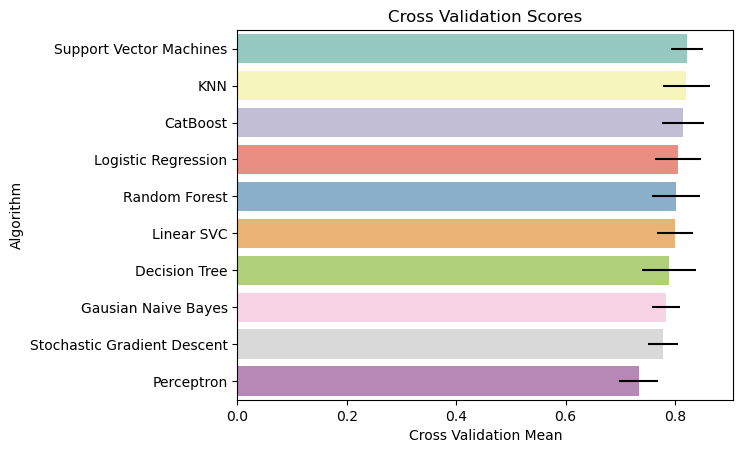

In [148]:
sns.barplot(x='Cross Validation Mean', y='Algorithm', data = cv_res, order = cv_res.sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': cv_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')

In [149]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, Y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.757 total time=   1.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.739 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.814 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.784 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.761 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.718 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.780 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.795 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.801 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.784 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.807 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.831 total time=   0.1s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.835 total time=   0.2s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.830 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.784 total time=   0.1s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.864 total time=   0.1s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.802 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.812 total time=   0.0s
[CV 3/5] END ...C=1000, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [150]:
print("Best parameters: ", grid.best_params_) 
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator:  SVC(C=100, gamma=0.01)


In [151]:
# Training accuracy

svc = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.54

In [152]:
# Mean cross validation score

cross_val_score(svc, X_train, Y_train, scoring = 'accuracy', cv = 10).mean()

0.8297242083758938

In [153]:
# Survival predictions by support vector classifier

Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [154]:
len(Y_pred)

418

In [155]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [156]:
# Create submission dataframe

submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
submit.head()

,PassengerId,Survived
881,892,0
882,893,0
883,894,0
884,895,0
885,896,1


In [157]:
submit.shape

(418, 2)

In [158]:
# Create and save csv file 

submit.to_csv("svm_titanic.csv", index = False)